In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from helper_functions import *

In [141]:
FILEPATH = "/Users/carlosito/Library/CloudStorage/OneDrive-Personal/Personal Document/Hexamind/hexamind_code/Carrefour/Clustering/Trustadvisor_Playground/reviews.csv"
df = pd.read_csv(FILEPATH, index_col=0)
df.head()

titles  ratings  \
0               Mais ou est ma commande???        1   
1  Cela fait plusieurs semaines même plus…        1   
2              Commande Deliveroo annulé !        1   
3      une honte cette société qu'utilise…        1   
4  Tout se passe bien chez Carrefour City…        1   

                                             reviews  \
0  Commande N° 609249735,toujours non livrée,pass...   
1  Magasin de Carrefour Trans en Provence 83\nCel...   
2  Commande Deliveroo passé ce jour sans suite ca...   
3  une honte cette société qu'utilise Carrefour p...   
4  Tout se passe bien chez Carrefour City sauf po...   

                      dates  \
0  2023-02-07T17:39:04.000Z   
1  2023-02-06T14:48:53.000Z   
2  2023-02-08T10:54:56.000Z   
3  2023-02-04T18:29:49.000Z   
4  2023-02-05T11:41:45.000Z   

                                             replies               reply_dates  
0  Bonjour, nous vous informons que nous avons pr...  2023-02-08T09:48:06.000Z  
1                                                NaN                       NaN  
2  Bonjour, nous vous remercions pour cette infor...  2023-02-08T12:59:53.000Z  
3  Bonjour, pourriez-vous nous communiquer votre ...  2023-02-05T08:17:54.000Z  
4  Bonjour, pouvez-vous nous préciser quel magasi...  2023-02-04T16:18:10.000Z

In [4]:
df.shape

(2000, 6)

In [5]:
clean_df = remove_and_combined(df,
                    title_col='titles',
                    review_col='reviews')
# clean_df.to_csv('clean_df.csv')

## Plot some data visualizations

In [6]:
df['combined_reviews'].str.split().apply(len).mean()

100.3715

### Plot the `count of words by its length`

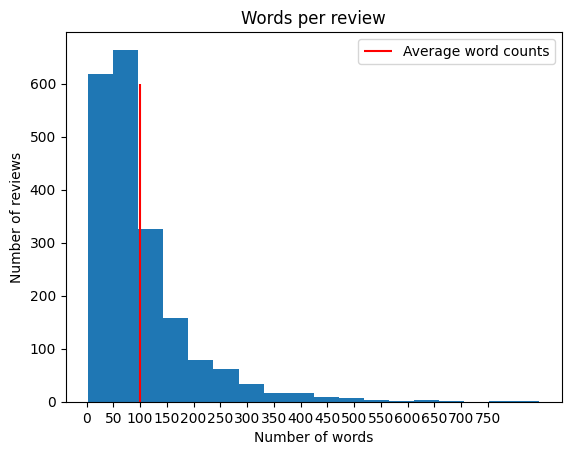

In [7]:
df['combined_reviews'].str.split().apply(len).hist(grid=False, bins=18)
plt.vlines(x = df['combined_reviews'].str.split().apply(len).mean(), 
           ymin=0, ymax=600, color='red', label='Average word counts')
plt.title('Words per review')
plt.xlabel('Number of words')
plt.xticks(np.arange(0,800, 50))
plt.ylabel('Number of reviews')
plt.legend()

### plot the boxplot of word lenght groupby star reviews

In [8]:
df['reviews_len']  = df['combined_reviews'].str.split().apply(len)
df.head()

titles  ratings  \
0               Mais ou est ma commande???        1   
1  Cela fait plusieurs semaines même plus…        1   
2              Commande Deliveroo annulé !        1   
3      une honte cette société qu'utilise…        1   
4  Tout se passe bien chez Carrefour City…        1   

                                             reviews  \
0  Commande N° 609249735,toujours non livrée,pass...   
1  Magasin de Carrefour Trans en Provence 83\nCel...   
2  Commande Deliveroo passé ce jour sans suite ca...   
3  une honte cette société qu'utilise Carrefour p...   
4  Tout se passe bien chez Carrefour City sauf po...   

                      dates  \
0  2023-02-07T17:39:04.000Z   
1  2023-02-06T14:48:53.000Z   
2  2023-02-08T10:54:56.000Z   
3  2023-02-04T18:29:49.000Z   
4  2023-02-05T11:41:45.000Z   

                                             replies  \
0  Bonjour, nous vous informons que nous avons pr...   
1                                                NaN   
2  Bonjour, nous vous remercions pour cette infor...   
3  Bonjour, pourriez-vous nous communiquer votre ...   
4  Bonjour, pouvez-vous nous préciser quel magasi...   

                reply_dates  \
0  2023-02-08T09:48:06.000Z   
1                       NaN   
2  2023-02-08T12:59:53.000Z   
3  2023-02-05T08:17:54.000Z   
4  2023-02-04T16:18:10.000Z   

                                        clean_review  \
0  Commande N° 609249735,toujours non livrée,pass...   
1  Magasin de Carrefour Trans en Provence 83Cela ...   
2  Commande Deliveroo passé ce jour sans suite ca...   
3  une honte cette société qu'utilise Carrefour p...   
4  Tout se passe bien chez Carrefour City sauf po...   

                                    combined_reviews  reviews_len  
0  Mais ou est ma commande??? Commande N° 6092497...           45  
1  Cela fait plusieurs semaines même plus… Magasi...           63  
2  Commande Deliveroo annulé ! Commande Deliveroo...           97  
3  une honte cette société qu'utilise… une honte ...           86  
4  Tout se passe bien chez Carrefour City… Tout s...           84

In [9]:
clean_df.groupby('ratings').aggregate({'combined_reviews' : ['count'],
                                       'reviews_len': ['mean', 'max', 'std']})

combined_reviews reviews_len                
                   count        mean  max        std
ratings                                             
1                   1551  107.676338  846  94.389370
2                    145   96.524138  599  88.235251
3                     82   71.670732  397  72.185299
4                     70   81.171429  640  97.099825
5                    152   53.828947  316  52.218057

<AxesSubplot: xlabel='ratings', ylabel='reviews_len'>

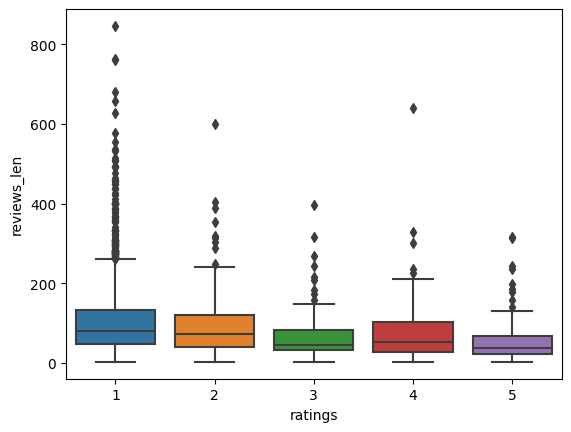

In [10]:
sns.boxplot(data=clean_df,
            x = 'ratings',
            y = 'reviews_len')

In [11]:
sht = clean_df[clean_df['ratings'] == 5].index
np.random.choice(sht, size = 200, replace=False)

ValueError: Cannot take a larger sample than population when 'replace=False'

In [13]:
clean_df[clean_df['ratings'].isin( [3,5])].shape

(234, 9)

To make sure we have the reviews sample from diffent star ratings, we loop through the dataframe and extract index to create demo sample size. As we see the hugely imbalanced dataset toward 1-star review, we limit the number of review from that classs to 200, and for other 2 - 5 star classes, we keep all the reviews because each class has less than 150 reviews

In [14]:
n_per_rating = 200
selected_idx = []
for star in range(1,6):
    print(f'rating: {star}')
    print(clean_df[clean_df['ratings'] == star].shape)
    if star == 1:
        np.random.seed(42)
        index_list = clean_df[clean_df['ratings'] == star].index
        index = np.random.choice(a = index_list,
                        size = n_per_rating,
                        replace=False)
        print(len(index))
        selected_idx.extend(index)
        print()
        
    else:
        index_list = clean_df[clean_df['ratings'] == star].index
        selected_idx.extend(index_list)
        print(len(selected_idx))
        print()
    

rating: 1
(1551, 9)
200

rating: 2
(145, 9)
345

rating: 3
(82, 9)
427

rating: 4
(70, 9)
497

rating: 5
(152, 9)
649



In [15]:
len(selected_idx)

649

In [17]:
selected_df = clean_df.iloc[selected_idx, :]
selected_df.shape
# selected_df.to_csv('selected_df.csv')

---

# Call the pre-trained model

In [99]:
import torch
from transformers import AutoModel, AutoTokenizer

In [152]:
modelname = 'flaubert/flaubert_base_cased'
flaubert_model = AutoModel.from_pretrained(modelname)
flaubert_tokenizer = AutoTokenizer.from_pretrained(modelname,
                                                   max_length = 512)

Some weights of the model checkpoint at flaubert/flaubert_base_cased were not used when initializing FlaubertModel: ['pred_layer.proj.bias', 'pred_layer.proj.weight']
- This IS expected if you are initializing FlaubertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing FlaubertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [153]:
sample_text = "Je parle pas bien francais"
token_ids = torch.tensor([flaubert_tokenizer.encode(sample_text,)])
print(token_ids, len(token_ids[0]))

tensor([[    0,   107,  1029,    42,    83, 28454,     1]]) 7


In [154]:
# torch.Size([1, 8, 768])  -> (batch size x number of tokens x embedding dimension)
print(flaubert_model(token_ids)[0].shape)

last_layer = flaubert_model(token_ids)[0]
# The BERT [CLS] token correspond to the first hidden state of the last layer
cls_embedding = last_layer[:, 0, :]
print(cls_embedding.shape)

torch.Size([1, 7, 768])
torch.Size([1, 768])


In [159]:
flaubert_tokenizer.model_max_length

512

In [160]:
def return_embed(text):
    token_ids = torch.tensor([flaubert_tokenizer.encode(text,
                                                        max_length= 512,
                                                        truncation=True)])
    last_layer = flaubert_model(token_ids)[0]
    cls_embedding = last_layer[:, 0, :]
    
    assert cls_embedding.shape == (1,768)
    return cls_embedding

print(return_embed(sample_text).shape)

torch.Size([1, 768])


In [161]:
selected_df.iloc[0]['combined_reviews']

"Aucun SAV à éviter Nous avons commandé et reçu une tablette,  à un prix très avantageux, jusque là, après avoir lu les autres avis, nous avons été chanceux. Après quelques utilisations, elle refuse de s'allumer. Nous avons encore eu la chance de réussir à contacter le SAV à l'étranger, bien entendu. Mais le courriel qui devait nous permettre de renvoyer la tablette ne nous est jamais parvenu. Depuis impossible de joindre le SAV, comme les autres, nous  patientons 5 minutes puis on nous annonce que personne ne peut nous répondre. Les courriels ne sont pas plus efficaces : réponse automatique sans suite..."

In [162]:
selected_df['flaubert_embedding'] = 0

/var/folders/tl/rdcj6pp130g_pdpr6thc58qr0000gn/T/ipykernel_9132/189584944.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_df['flaubert_embedding'] = 0


In [163]:
selected_df['combined_reviews'].apply(lambda x: return_embed(x) )

### To speed up the process of embedding with `Flaubert`
I moved to Colab for faster speed processing thanks to GPU, then download the dataframe with the resulting embedding here

In [108]:
# load numpy array from csv file
from numpy import loadtxt
# load array
data = loadtxt('data.csv', delimiter=',')

In [109]:
data.shape

(649, 768)

# Perform the `K-mean Clustering`

In [14]:
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score

km = KMeans(n_clusters=2, max_iter=100)

In [110]:
km = KMeans(n_clusters=3,
            init='k-means++', random_state=42,
            n_init = 1)
km.fit(data)

KMeans(n_clusters=3, n_init=1, random_state=42)

In [111]:
print(davies_bouldin_score(X = data, labels =km.labels_ ))

2.4116217338249157


In [112]:
inertia_record = []
db_score_record = []
for cluster in range(2,15):
    km = KMeans(n_clusters=cluster,
            init='k-means++', random_state=42,
            n_init = 1)
    km.fit(data)
    inertia_record.append(km.inertia_)
    db_score_record.append(davies_bouldin_score(X = data, labels =km.labels_ ))
    

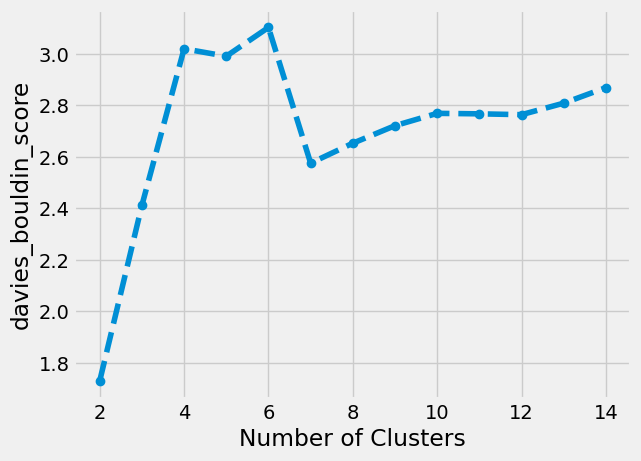

In [113]:
plt.plot(np.arange(2,15), db_score_record, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('davies_bouldin_score')
plt.show()

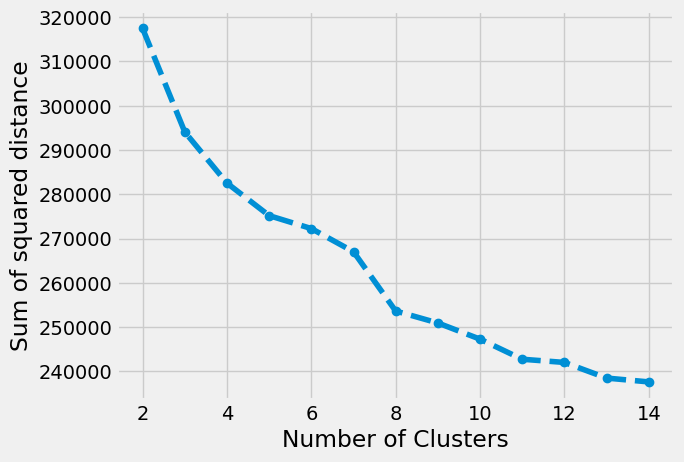

In [114]:
plt.plot(np.arange(2,15), inertia_record, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of squared distance')
plt.show()

## Dimensionality Reduction

In [28]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [115]:
pca = PCA()
pca.fit(data)

PCA()

In [116]:
pca.explained_variance_ratio_[:100].sum()

0.818493694269721

Text(0, 0.5, 'Cumulative Explained Variance')

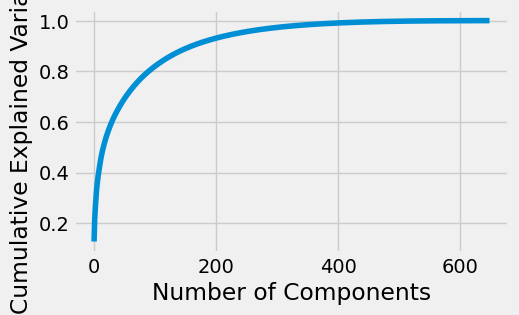

In [118]:
plt.figure(figsize=(5,3))
plt.plot(range( len(data)), pca.explained_variance_ratio_.cumsum())
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

In [86]:
# pca = PCA(n_components=2)
# data = pca.fit_transform(data)

# print(data.shape)
# print(data.shape)

(649, 2)
(649, 2)


### Try on the whole 768 dimensions without reductions

In [119]:
print(data.shape)

(649, 768)


In [120]:
inertia_record = []
db_score_record = []
for cluster in range(2,15):
    km = KMeans(n_clusters=cluster,
            init='k-means++', random_state=42,
            n_init = 1)
    km.fit(data)
    inertia_record.append(km.inertia_)
    db_score_record.append(davies_bouldin_score(X = data, labels =km.labels_ ))

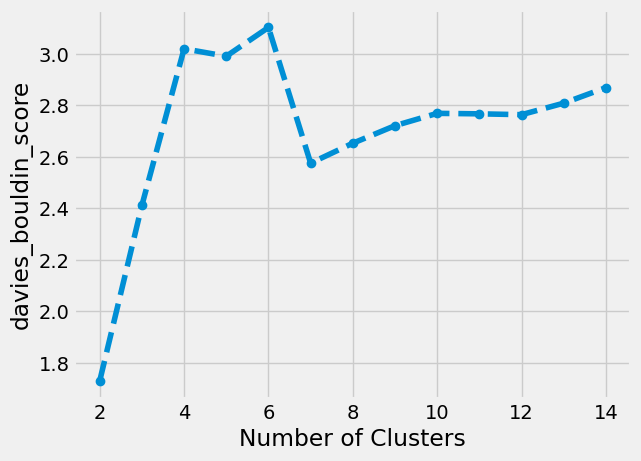

In [121]:
plt.plot(np.arange(2,15), db_score_record, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('davies_bouldin_score')
plt.show()

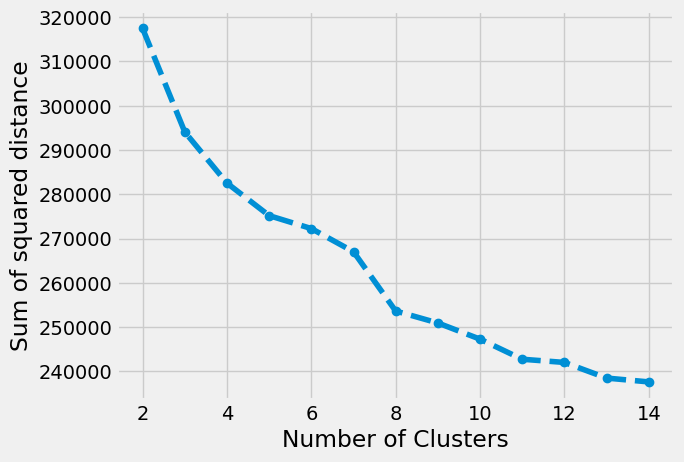

In [122]:
plt.plot(np.arange(2,15), inertia_record, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of squared distance')
plt.show()

### Try on the whole 100 dimensions without reductions

In [124]:
pca = PCA(n_components=100)
data_100 = pca.fit_transform(data)

print(data.shape)
print(data_100.shape)

inertia_record = []
db_score_record = []
for cluster in range(2,15):
    km = KMeans(n_clusters=cluster,
            init='k-means++', random_state=42,
            n_init = 1)
    km.fit(data_100)
    inertia_record.append(km.inertia_)
    db_score_record.append(davies_bouldin_score(X = data_100, labels =km.labels_ ))

(649, 768)
(649, 100)


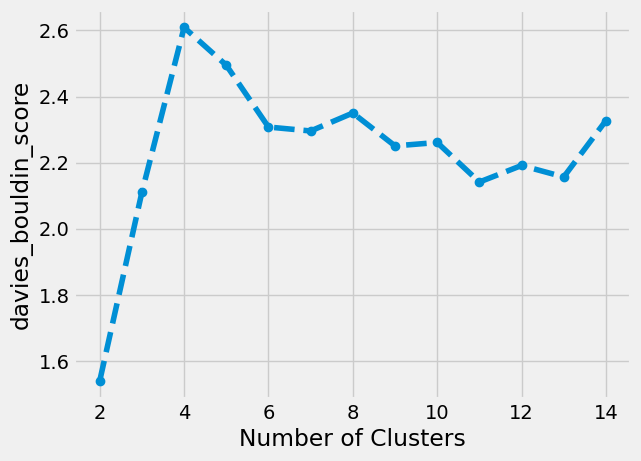

In [125]:
plt.plot(np.arange(2,15), db_score_record, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('davies_bouldin_score')
plt.show()

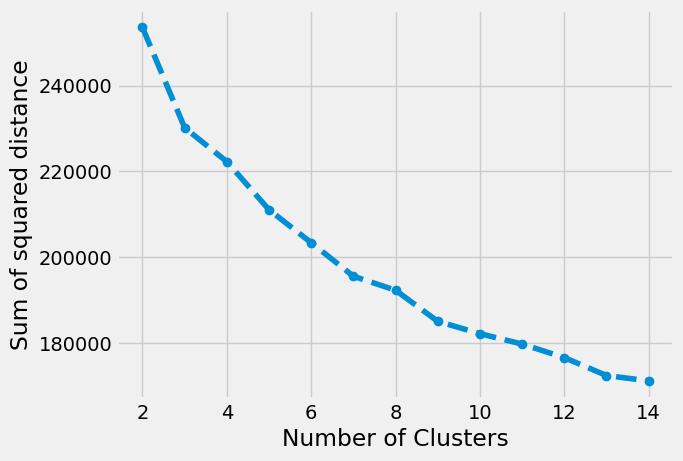

In [126]:
plt.plot(np.arange(2,15), inertia_record, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of squared distance')
plt.show()

For n_clusters = 2 The average silhouette_score is : 0.30475335397374576
For n_clusters = 3 The average silhouette_score is : 0.17837832750942986
For n_clusters = 4 The average silhouette_score is : 0.15024085819155109
For n_clusters = 5 The average silhouette_score is : 0.07653323022321118
For n_clusters = 6 The average silhouette_score is : 0.07528415770198246
For n_clusters = 7 The average silhouette_score is : 0.08118011256984921
For n_clusters = 8 The average silhouette_score is : 0.06611727978299307
For n_clusters = 9 The average silhouette_score is : 0.07585894268141435
For n_clusters = 10 The average silhouette_score is : 0.07463887037041754
For n_clusters = 11 The average silhouette_score is : 0.07591277736295653
For n_clusters = 12 The average silhouette_score is : 0.0803259881502106
For n_clusters = 13 The average silhouette_score is : 0.08483071646529106
For n_clusters = 14 The average silhouette_score is : 0.08162025992149011


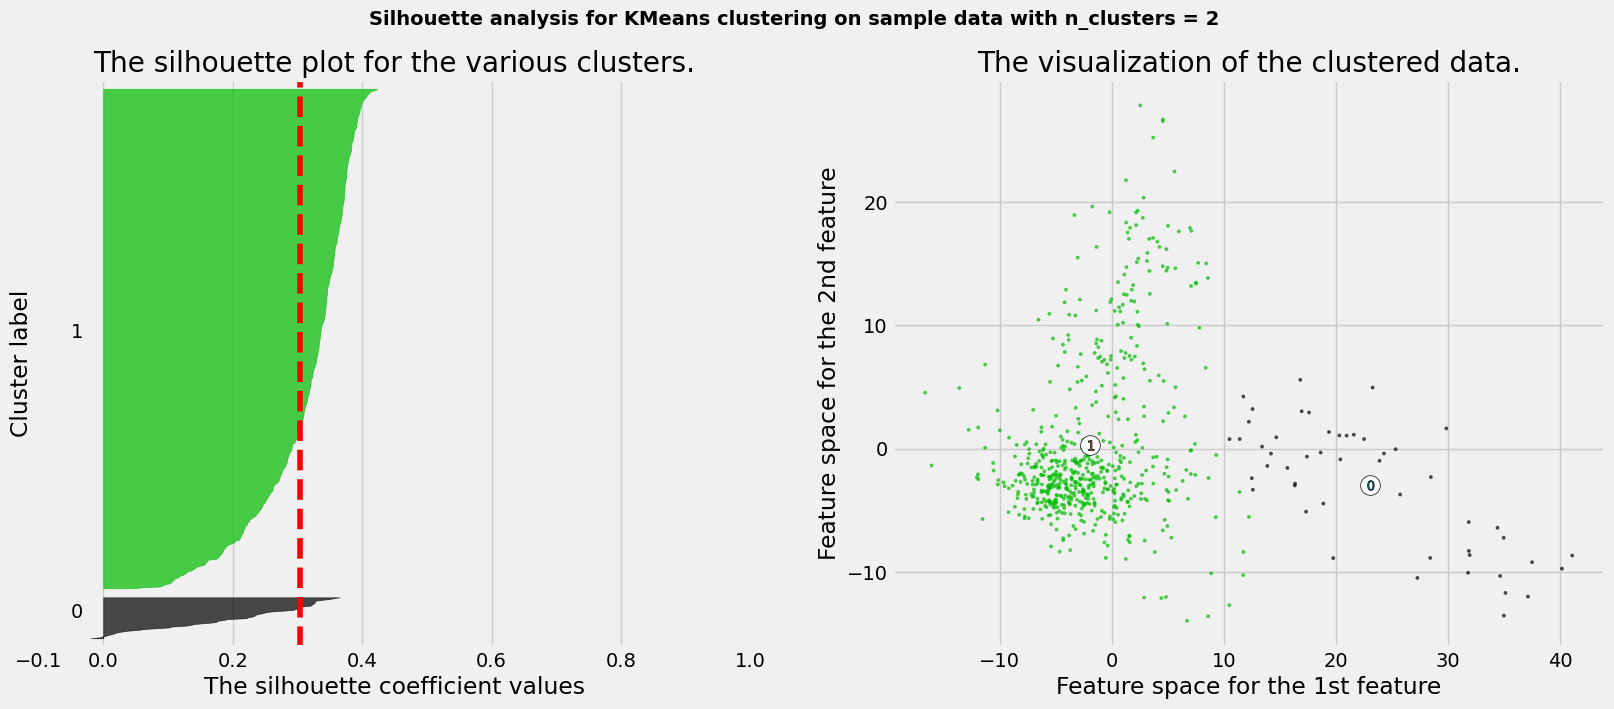

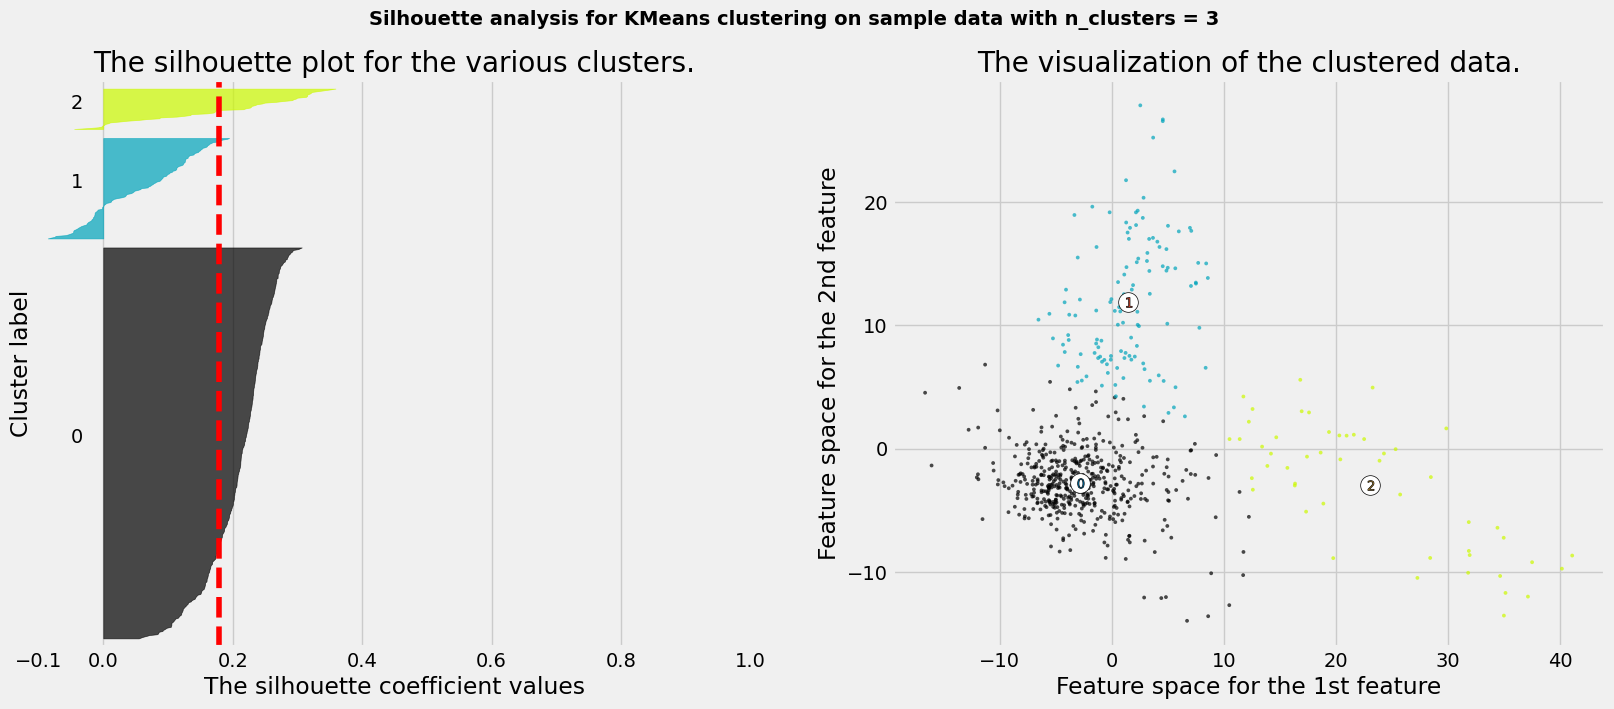

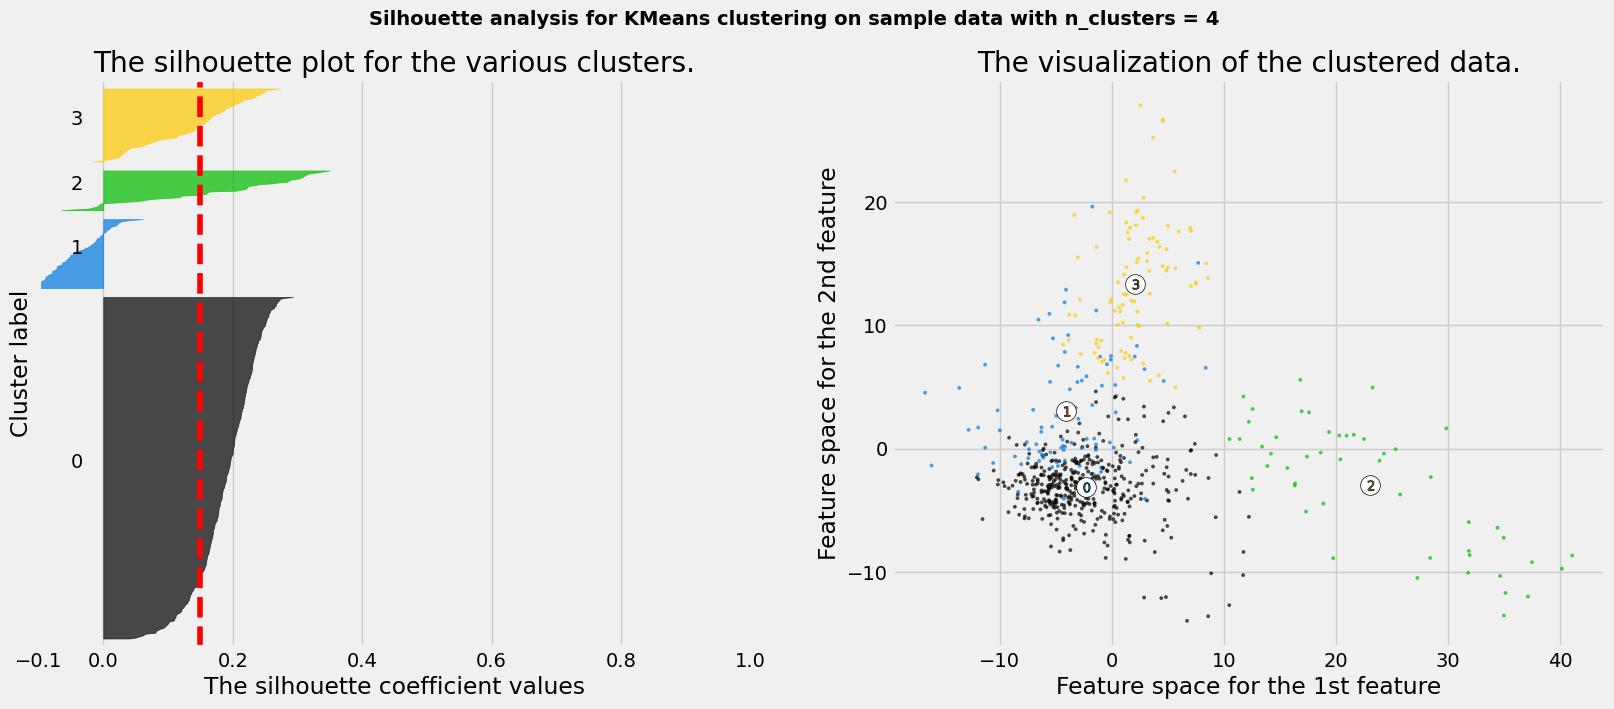

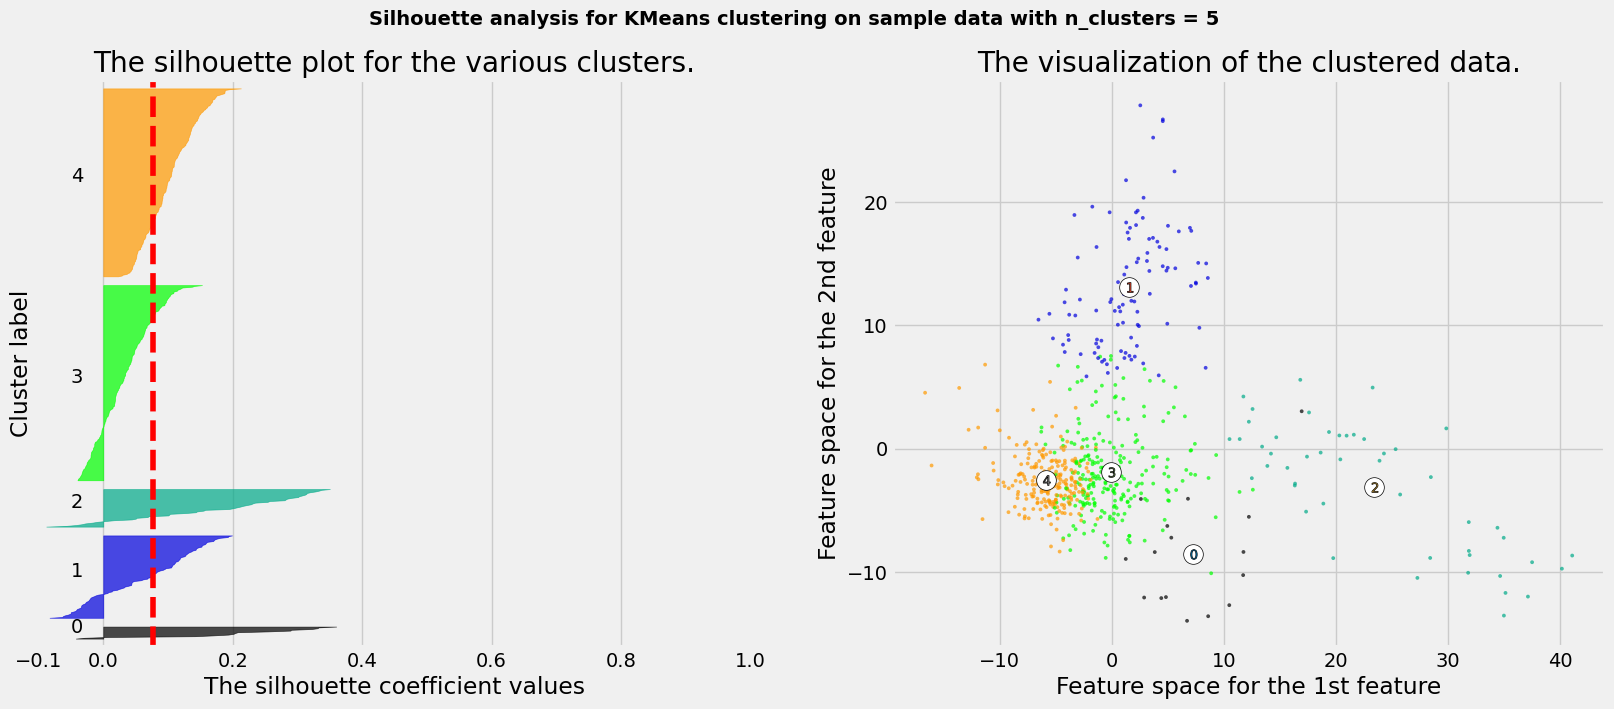

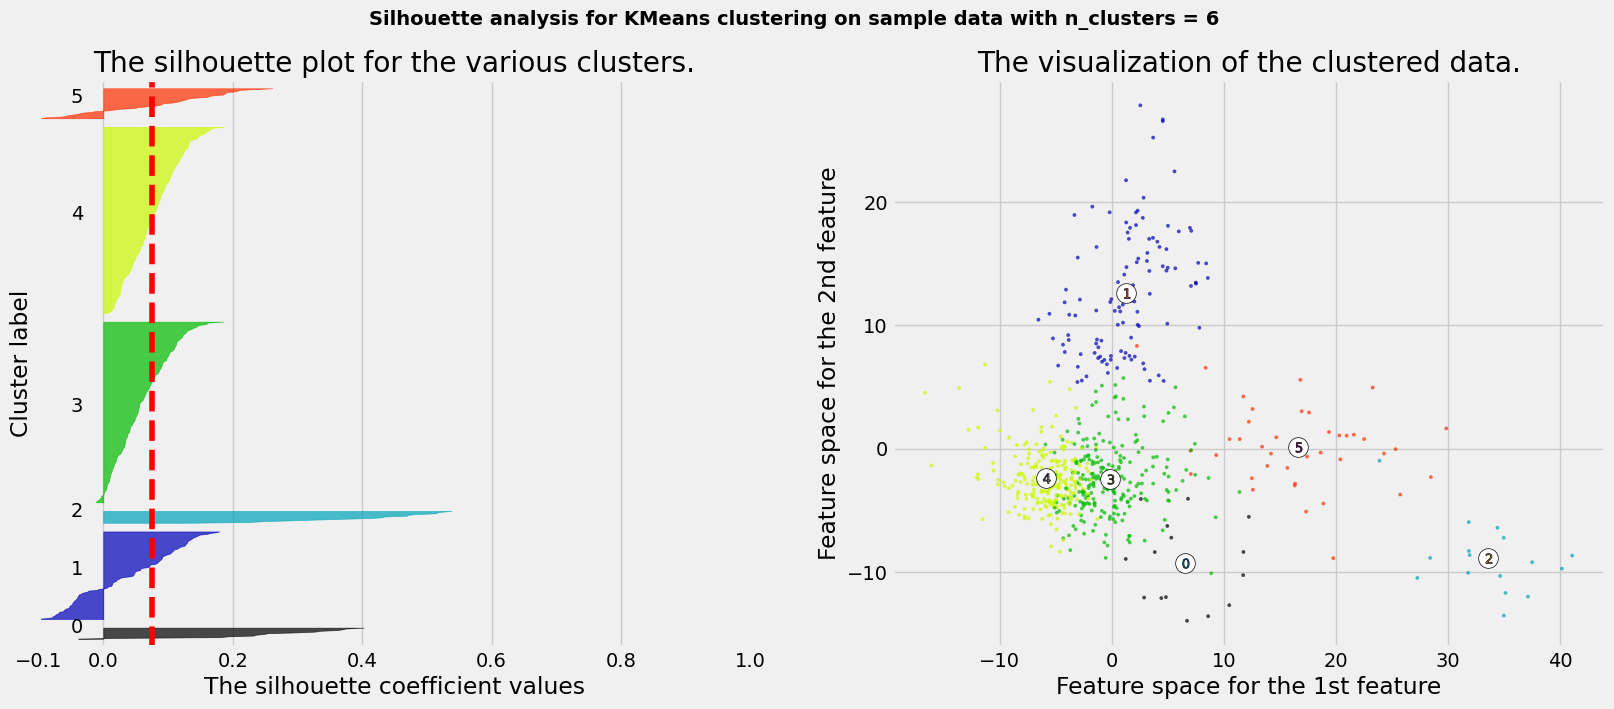

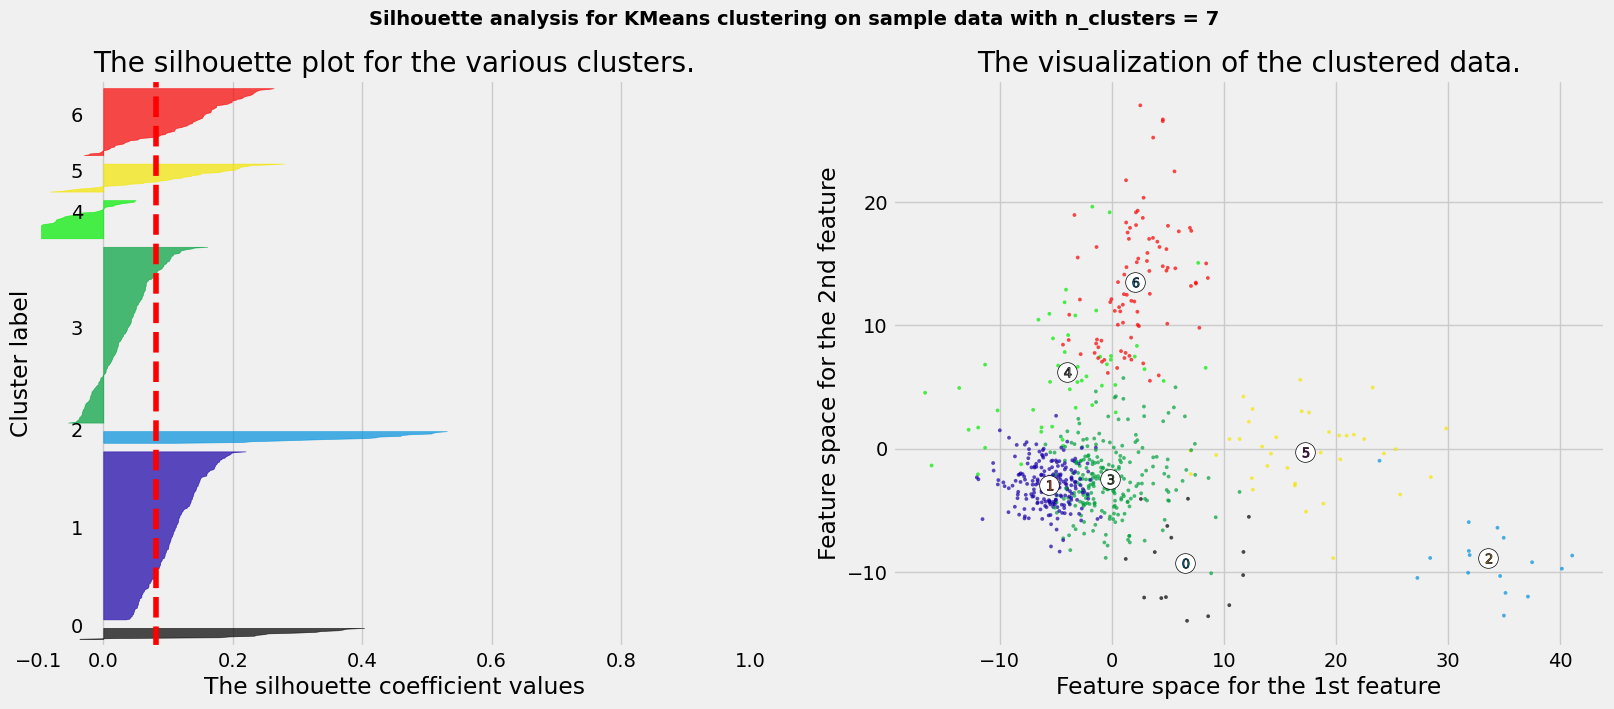

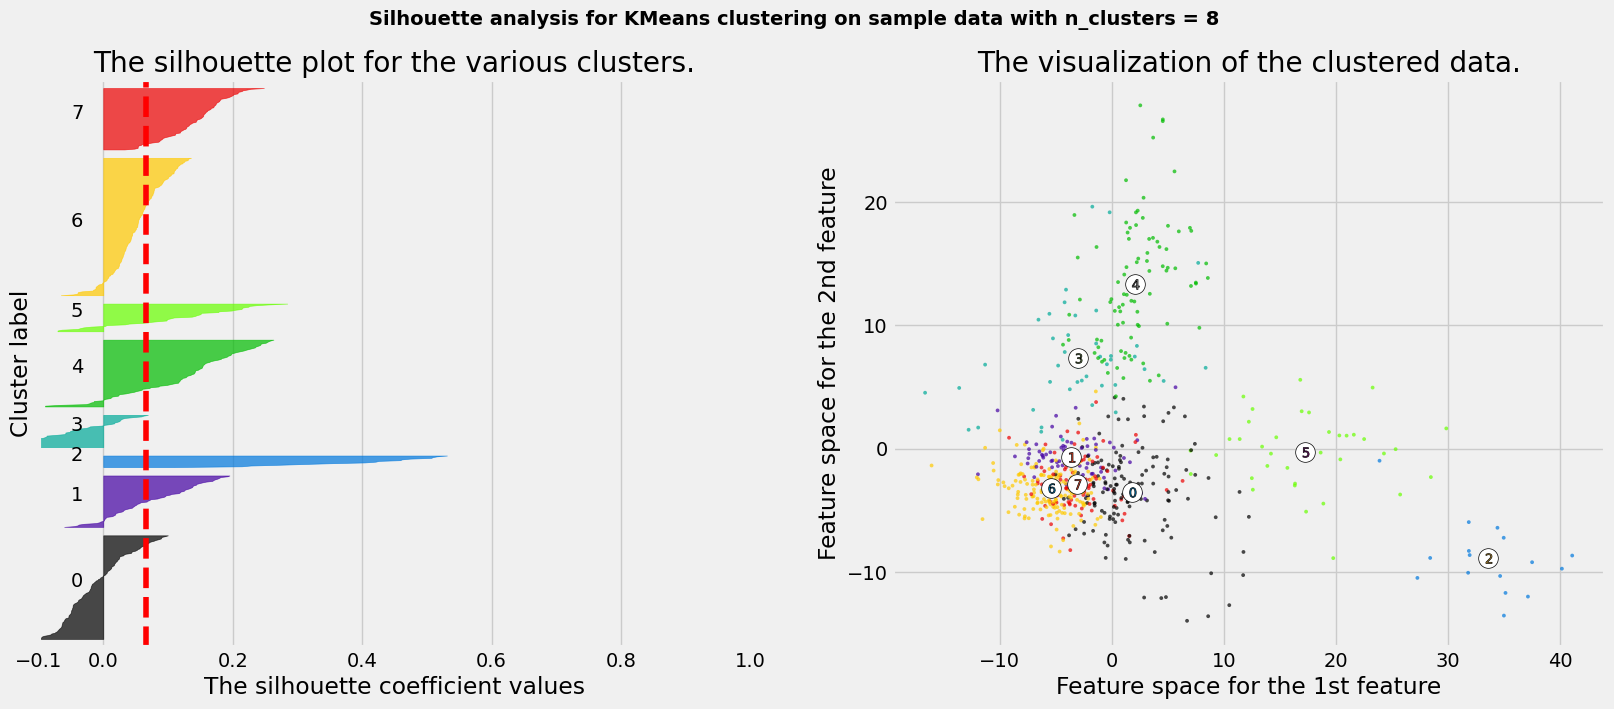

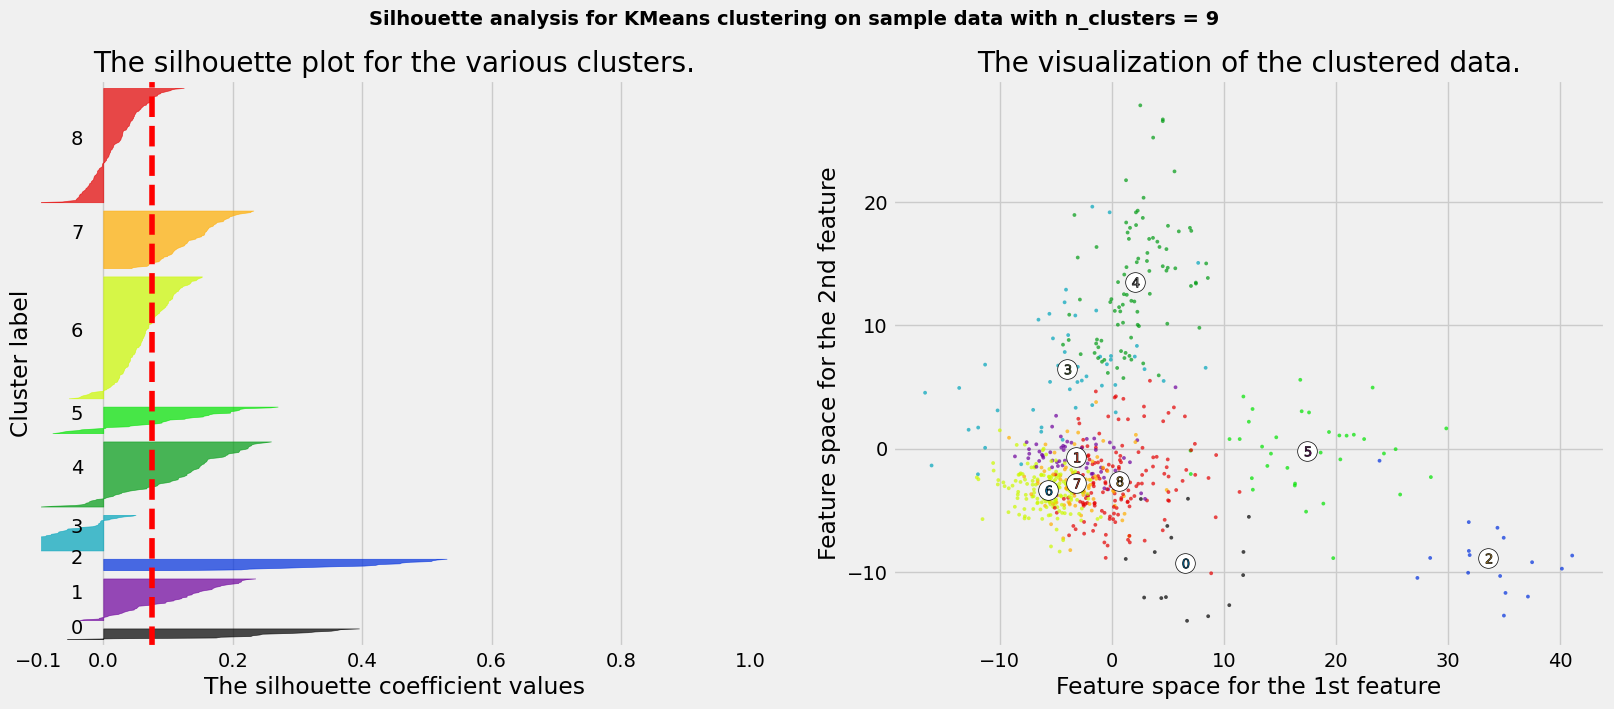

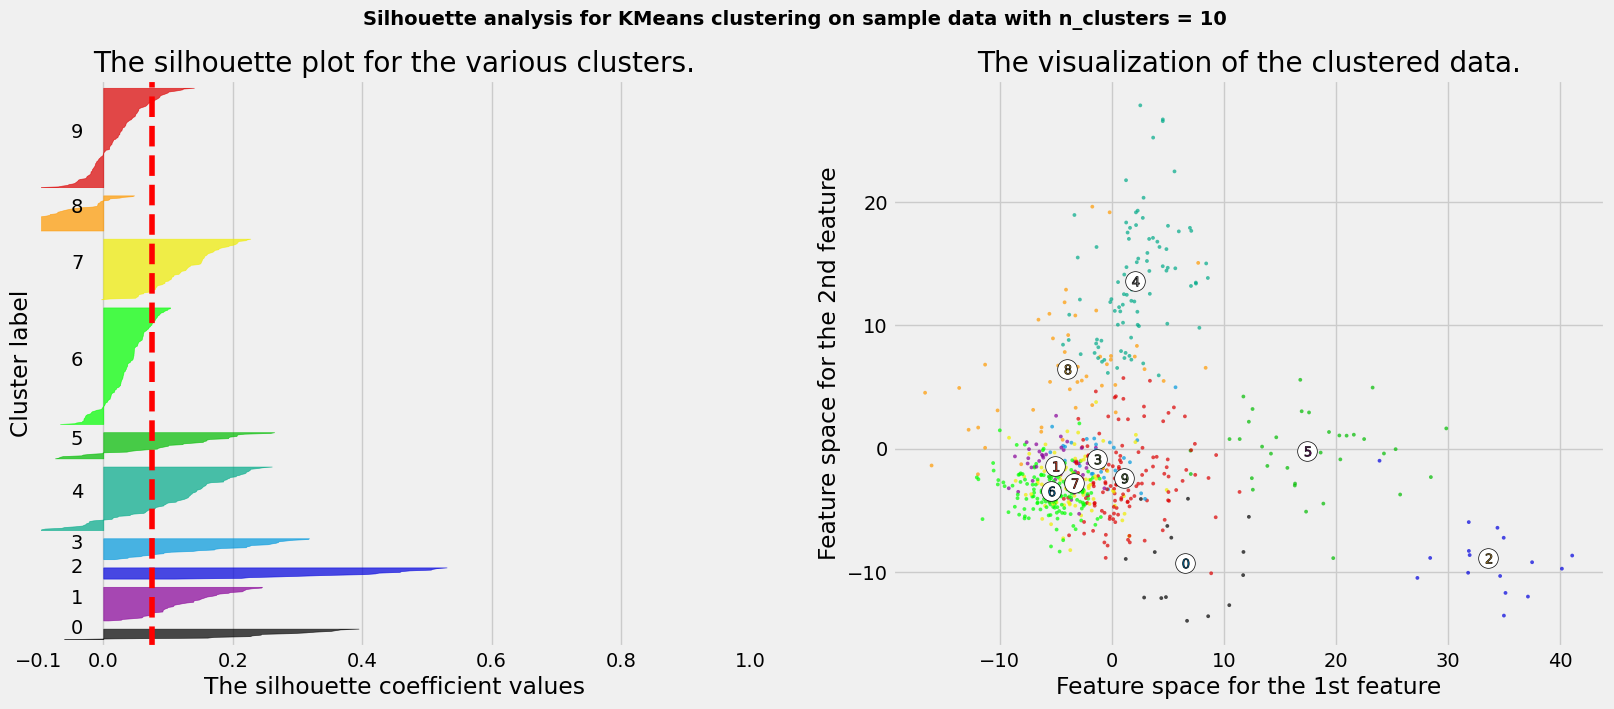

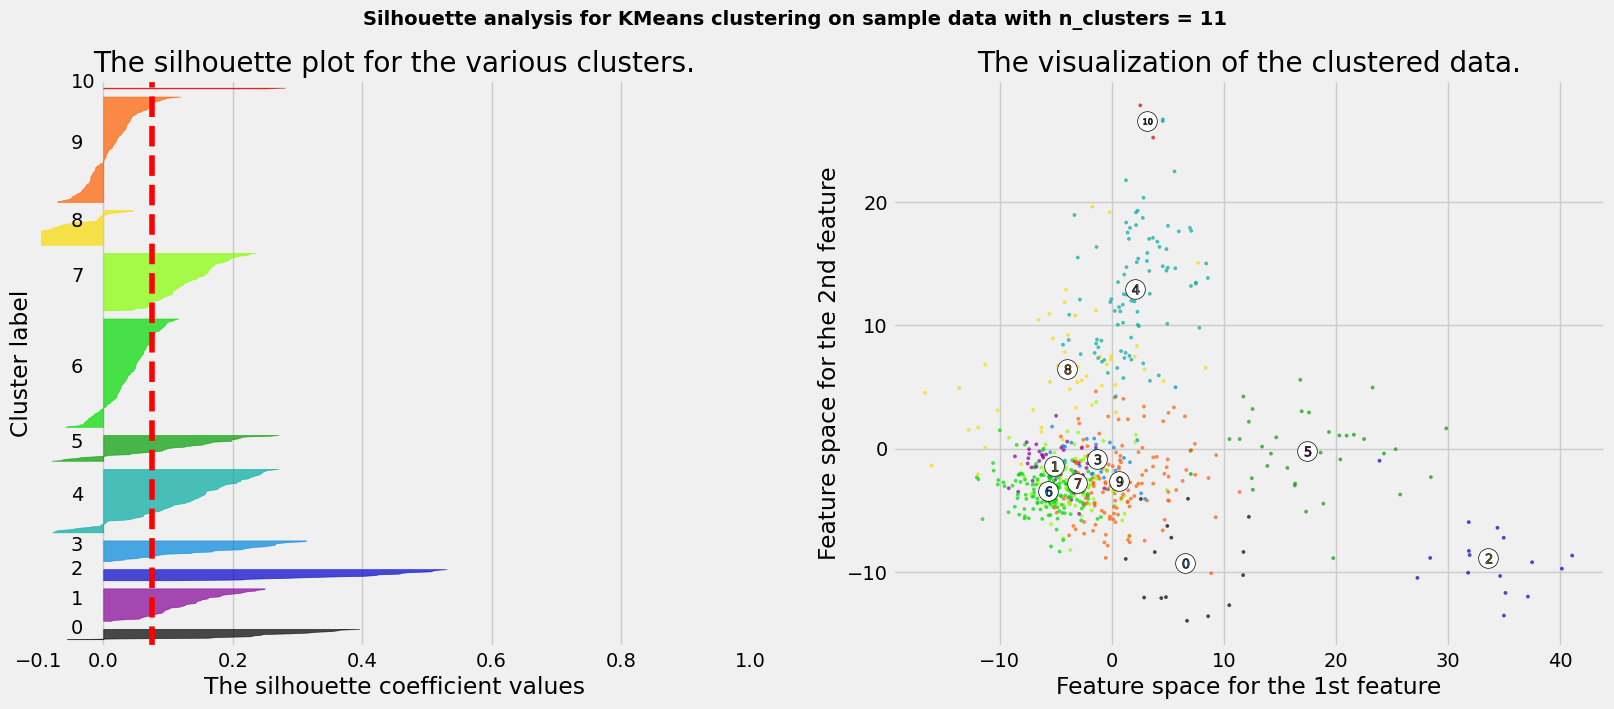

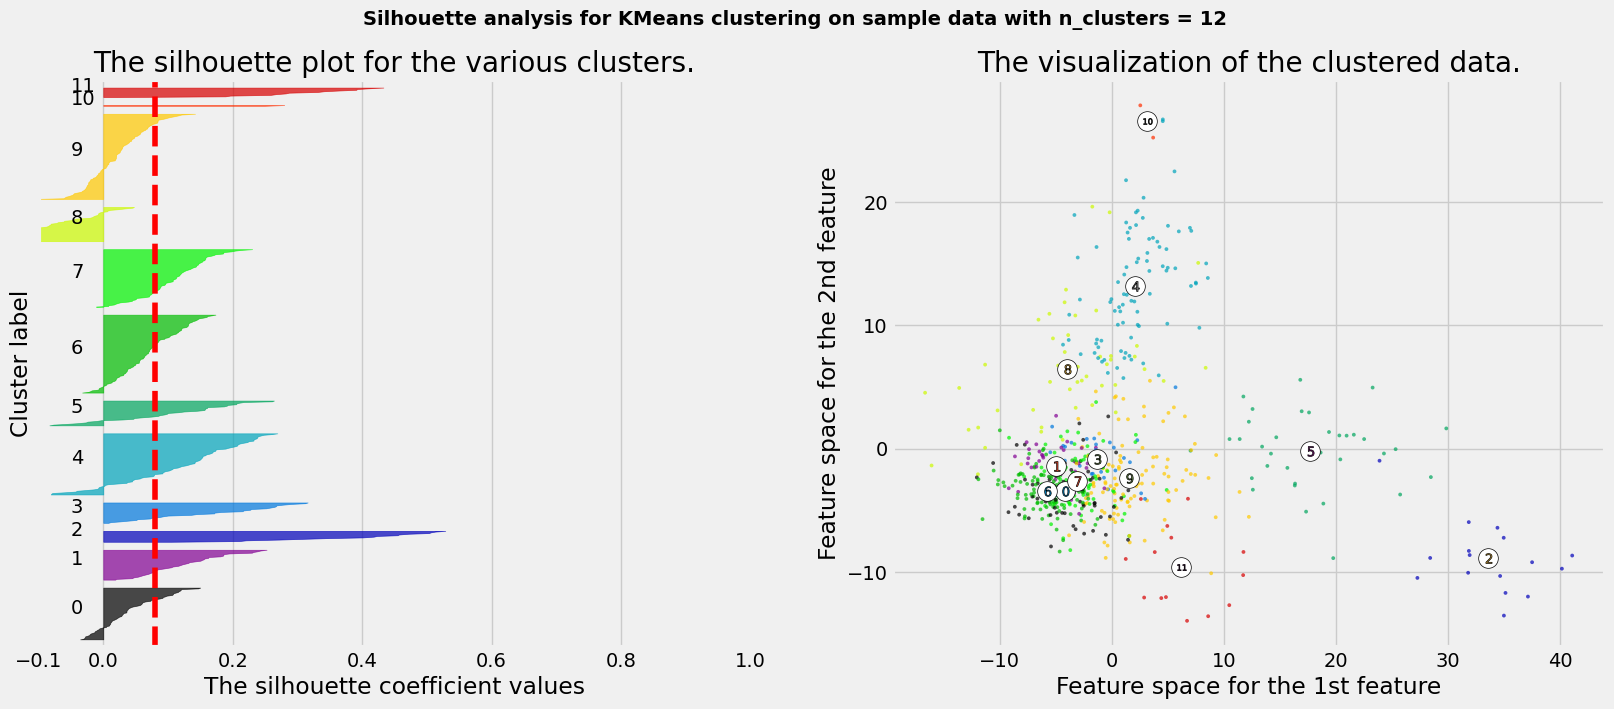

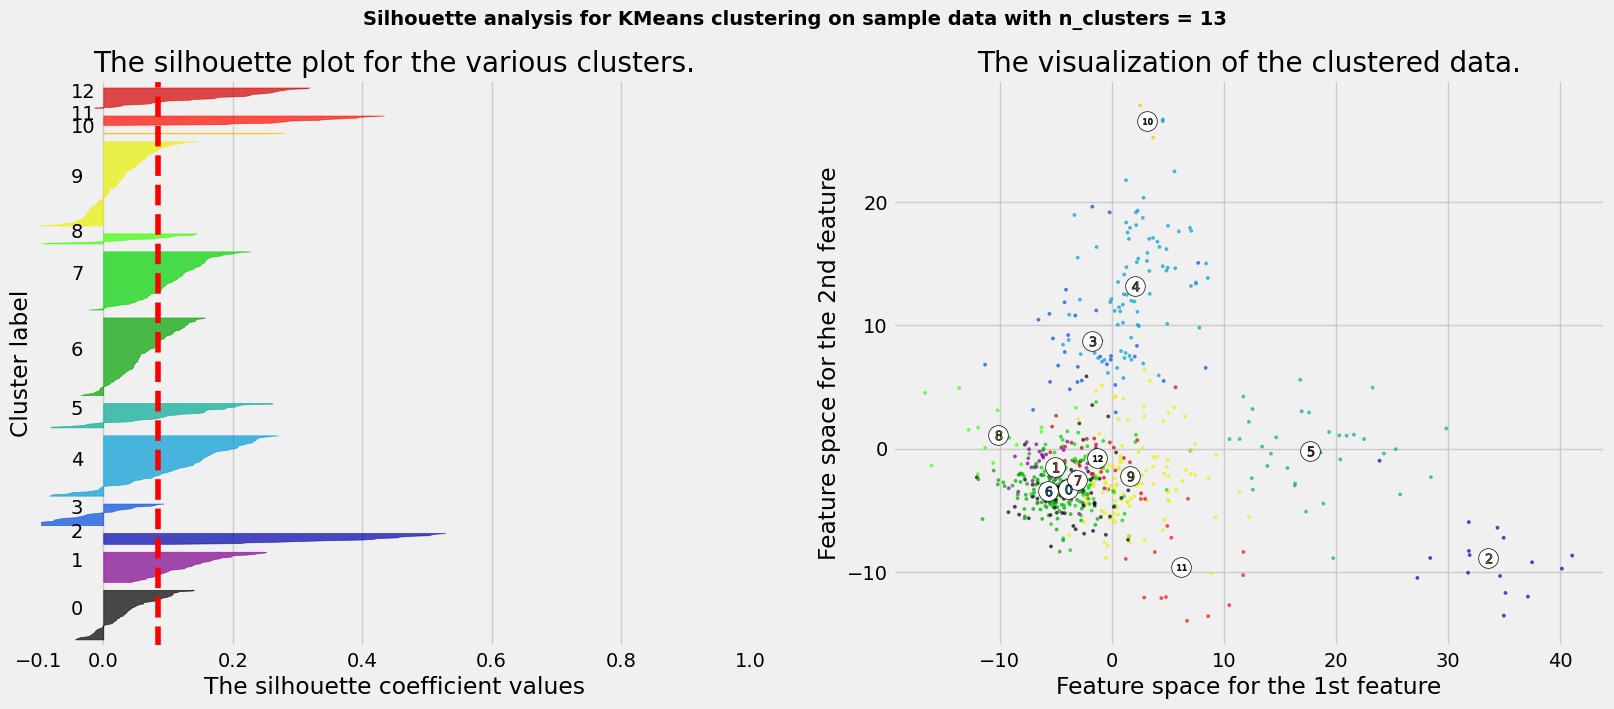

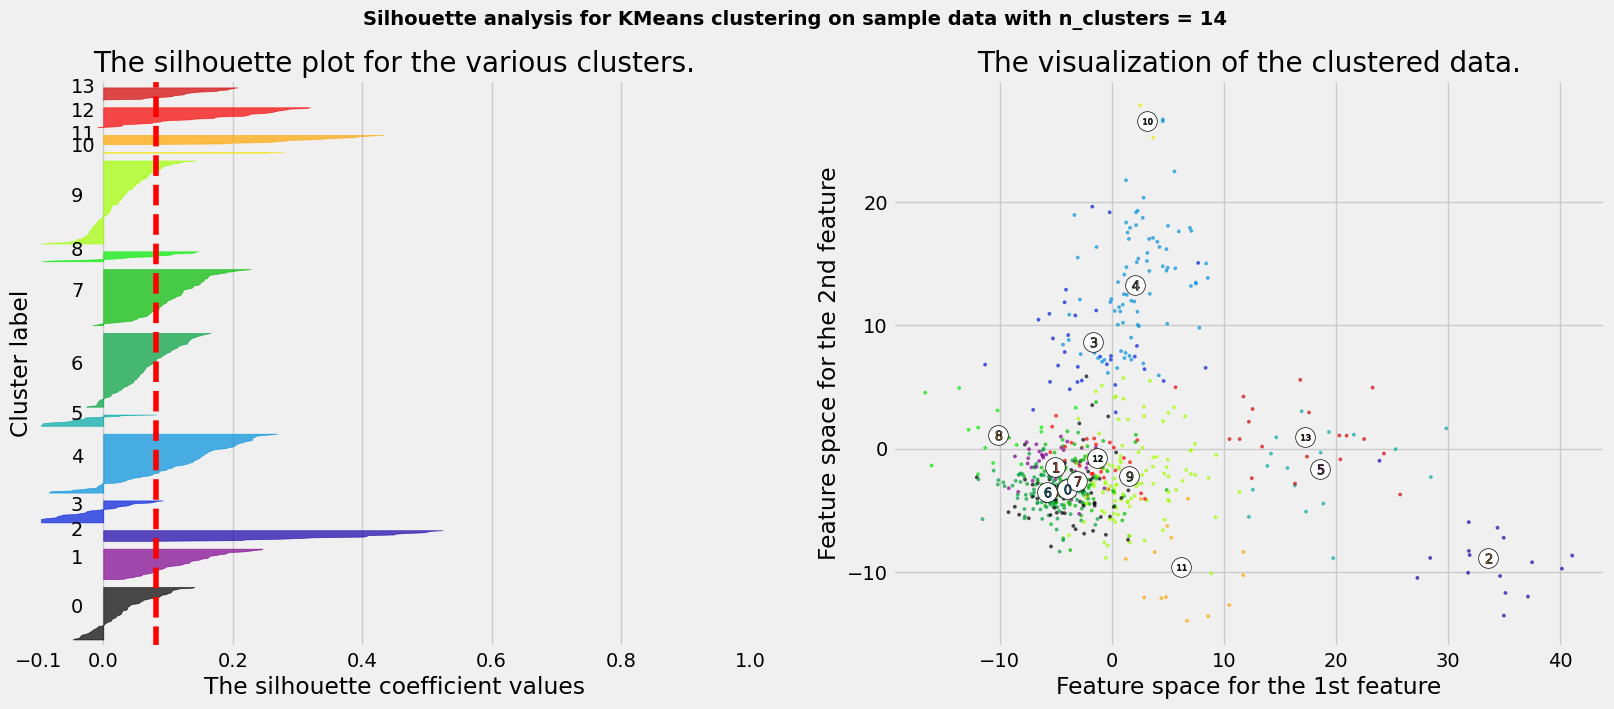

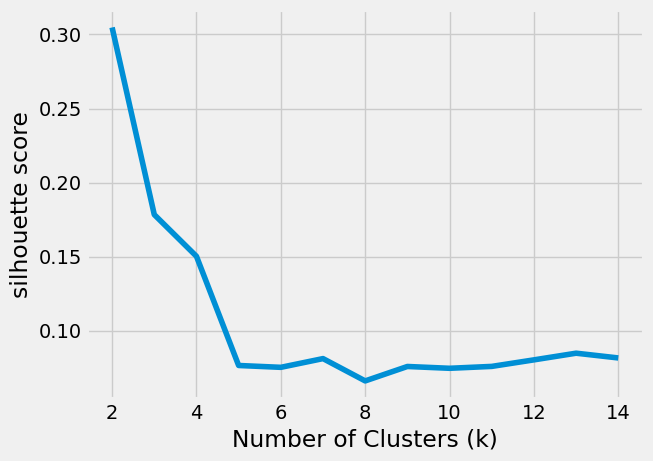

In [127]:
range_n_clusters = np.arange(2, 15)
silhouette_avg_n_clusters = []

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(data_100) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=42, n_init=1)
    cluster_labels = clusterer.fit_predict(data_100)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(data_100, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    silhouette_avg_n_clusters.append(silhouette_avg)
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(data_100, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(data_100[:, 0], data_100[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()


style.use("fivethirtyeight")
plt.plot(range_n_clusters, silhouette_avg_n_clusters)
plt.xlabel("Number of Clusters (k)")
plt.ylabel("silhouette score")
plt.show()

### Try on the 2 dimensions

In [128]:
pca = PCA(n_components=2)
data_2 = pca.fit_transform(data)

print(data.shape)
print(data_2.shape)

inertia_record = []
db_score_record = []
for cluster in range(2,15):
    km = KMeans(n_clusters=cluster,
            init='k-means++', random_state=42,
            n_init = 1)
    km.fit(data_2)
    inertia_record.append(km.inertia_)
    db_score_record.append(davies_bouldin_score(X = data_2, labels =km.labels_ ))

(649, 768)
(649, 2)


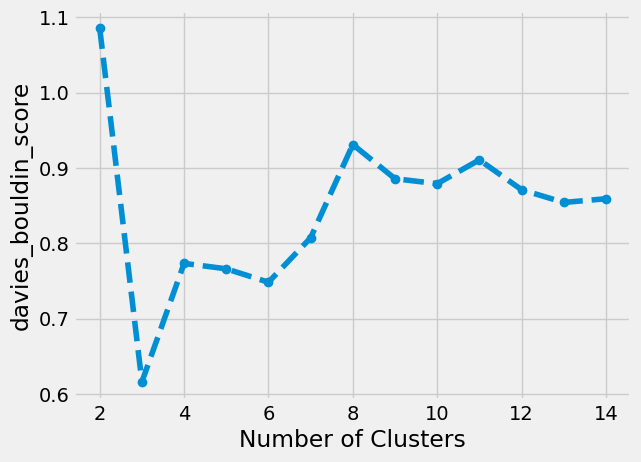

In [129]:
plt.plot(np.arange(2,15), db_score_record, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('davies_bouldin_score')
plt.show()

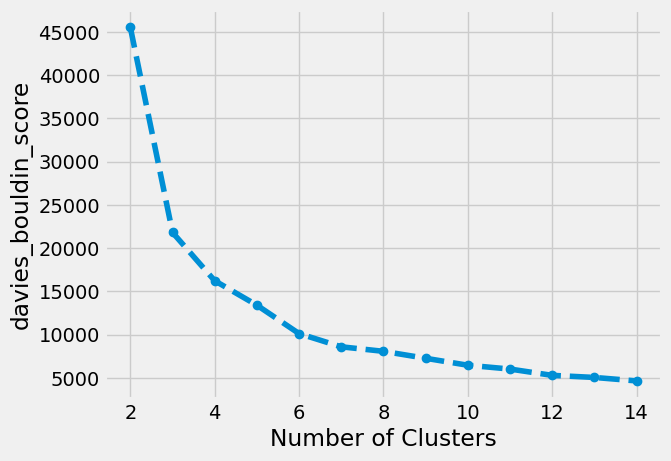

In [132]:
plt.plot(np.arange(2,15), inertia_record, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('davies_bouldin_score')
plt.show()

For n_clusters = 2 The average silhouette_score is : 0.5372670848539335
For n_clusters = 3 The average silhouette_score is : 0.5850882461470488
For n_clusters = 4 The average silhouette_score is : 0.4522070576879695
For n_clusters = 5 The average silhouette_score is : 0.45800644989461864
For n_clusters = 6 The average silhouette_score is : 0.40460492093295536
For n_clusters = 7 The average silhouette_score is : 0.36649603424530897
For n_clusters = 8 The average silhouette_score is : 0.3529431218818715
For n_clusters = 9 The average silhouette_score is : 0.33152545954456597
For n_clusters = 10 The average silhouette_score is : 0.3311859712101921
For n_clusters = 11 The average silhouette_score is : 0.3255663386113426
For n_clusters = 12 The average silhouette_score is : 0.33972334641559226
For n_clusters = 13 The average silhouette_score is : 0.33815008071550273
For n_clusters = 14 The average silhouette_score is : 0.34007902809262297


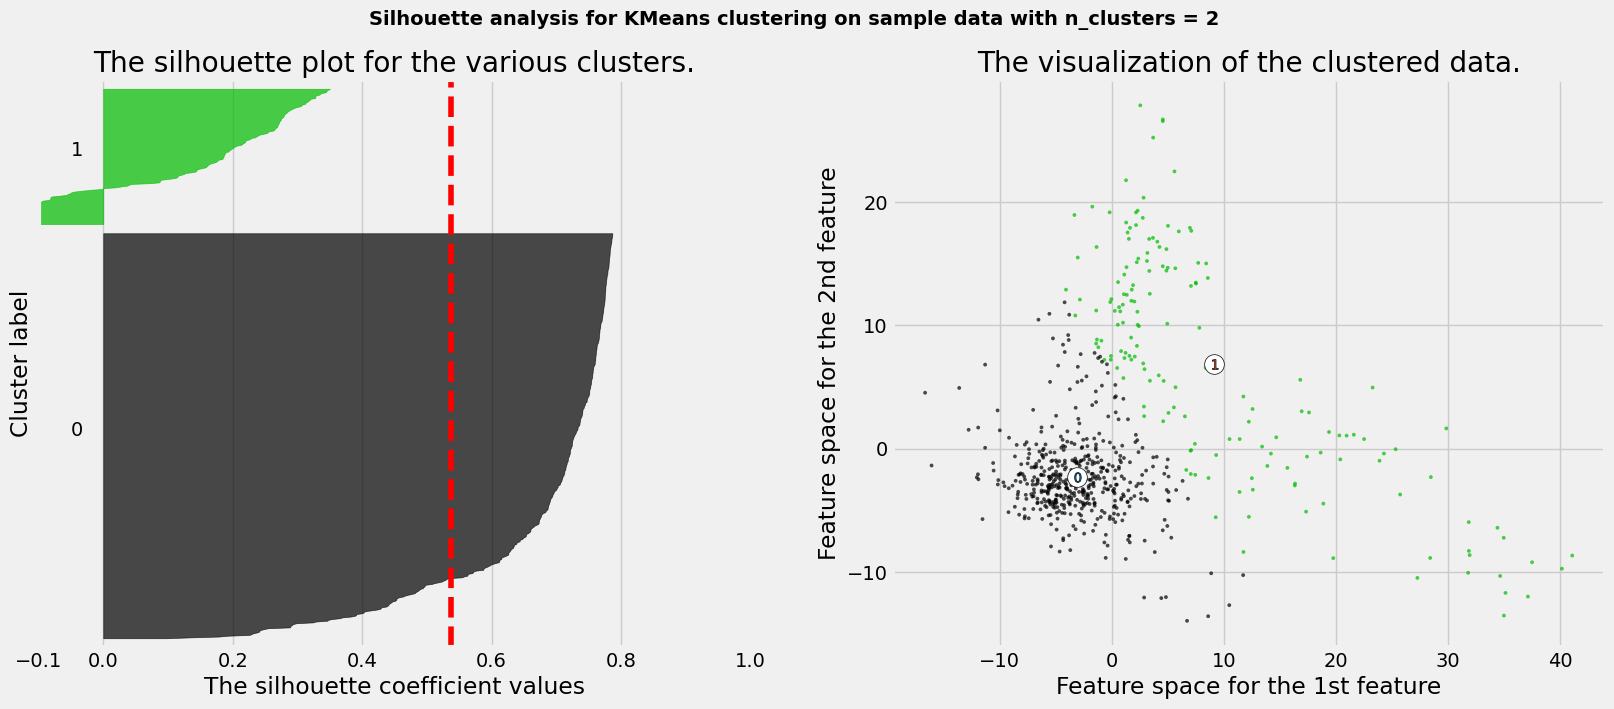

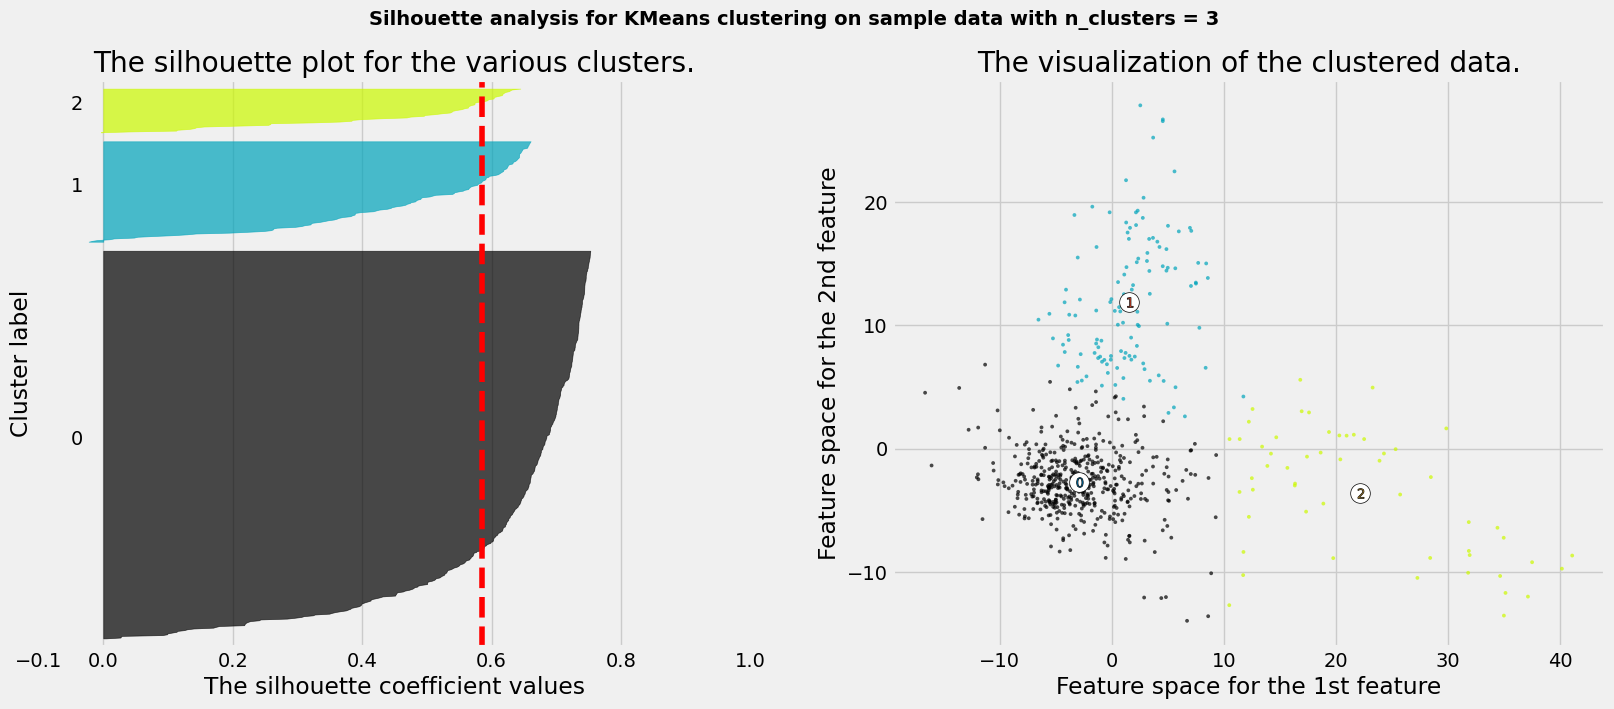

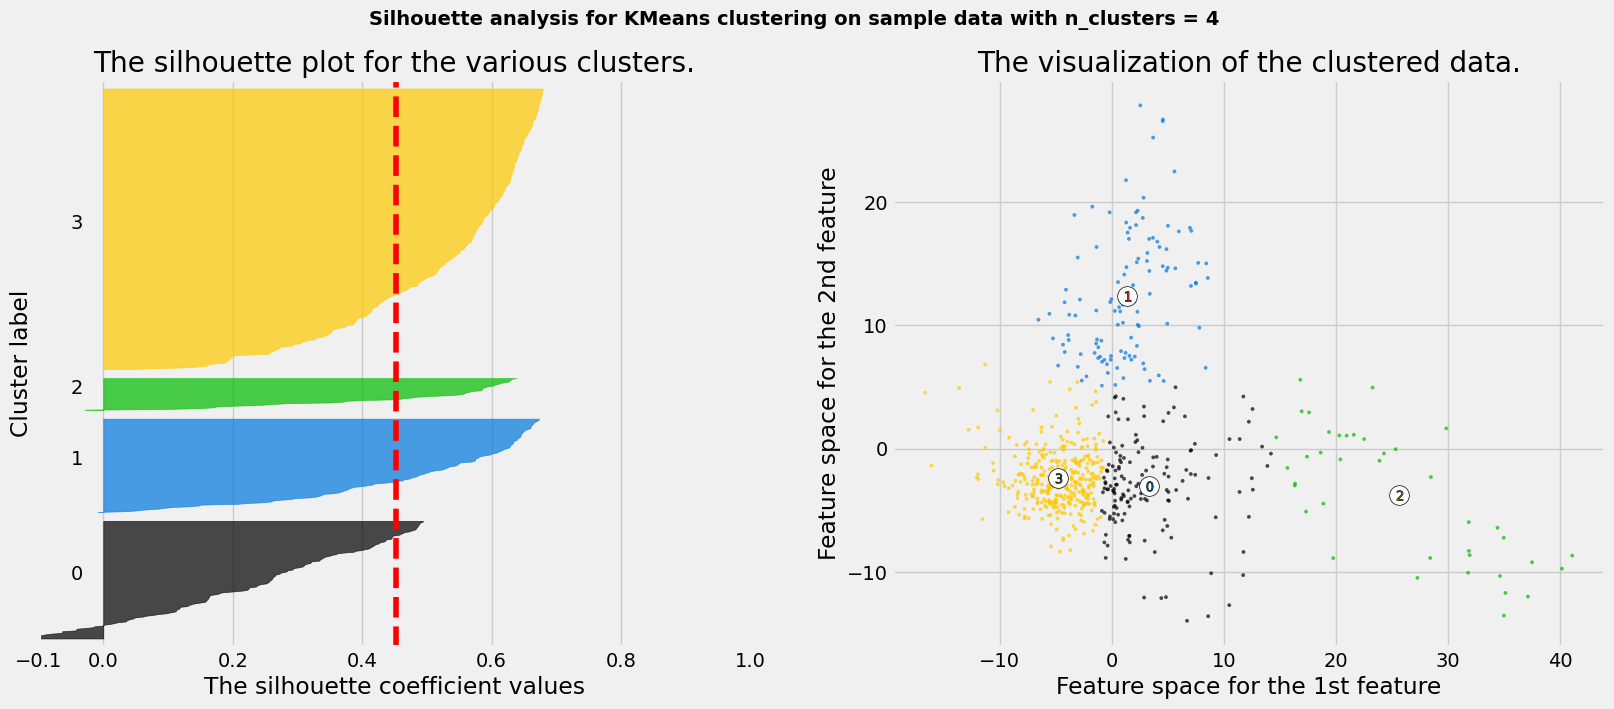

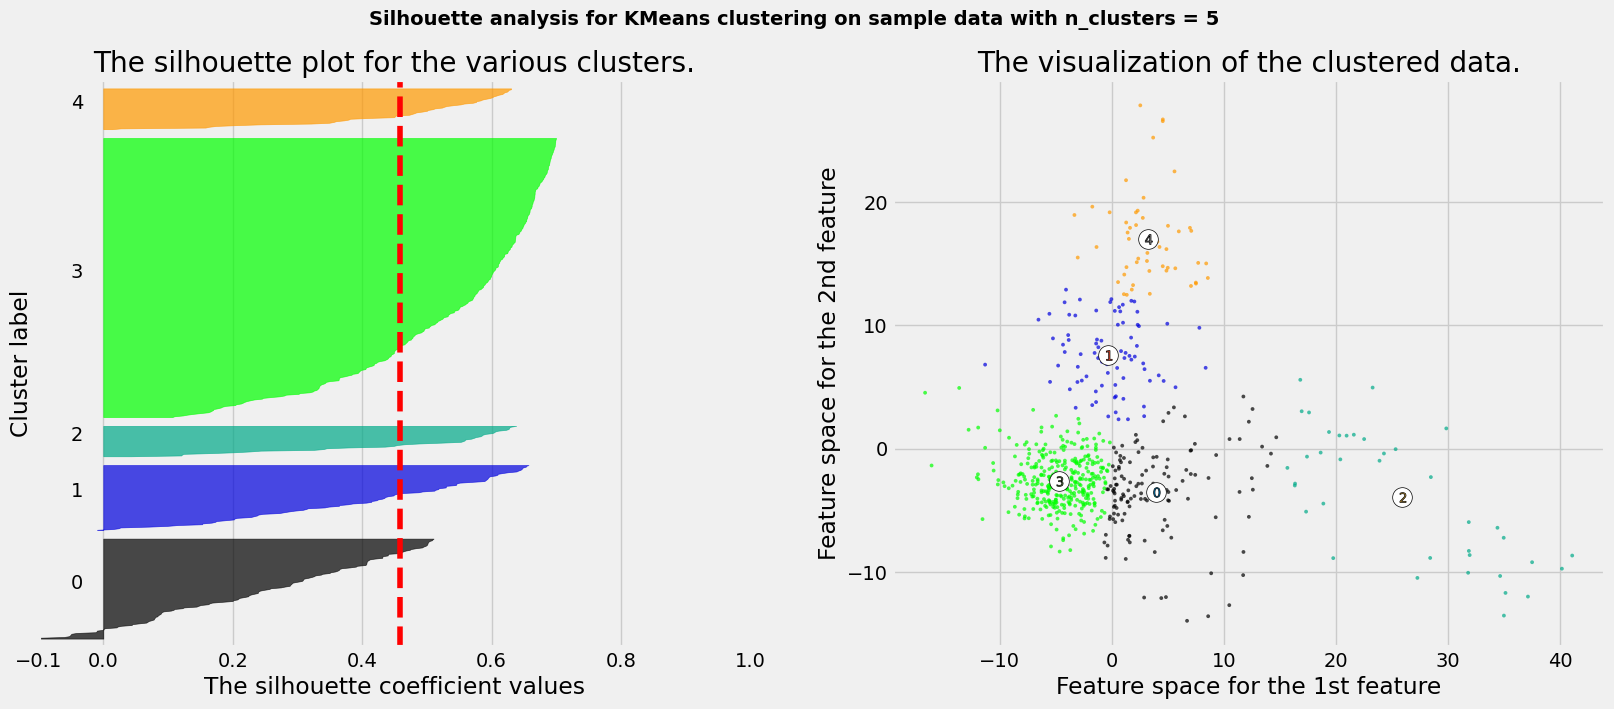

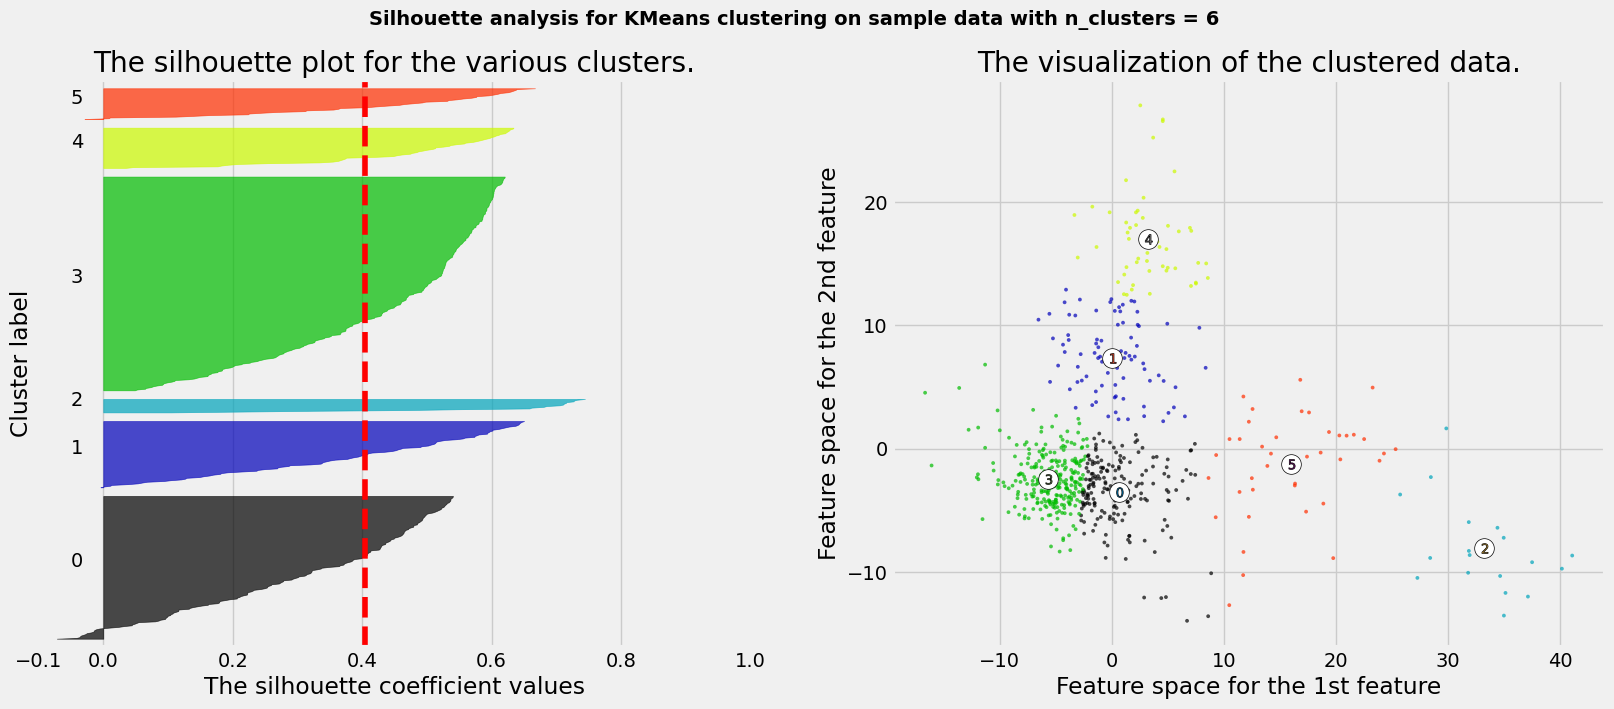

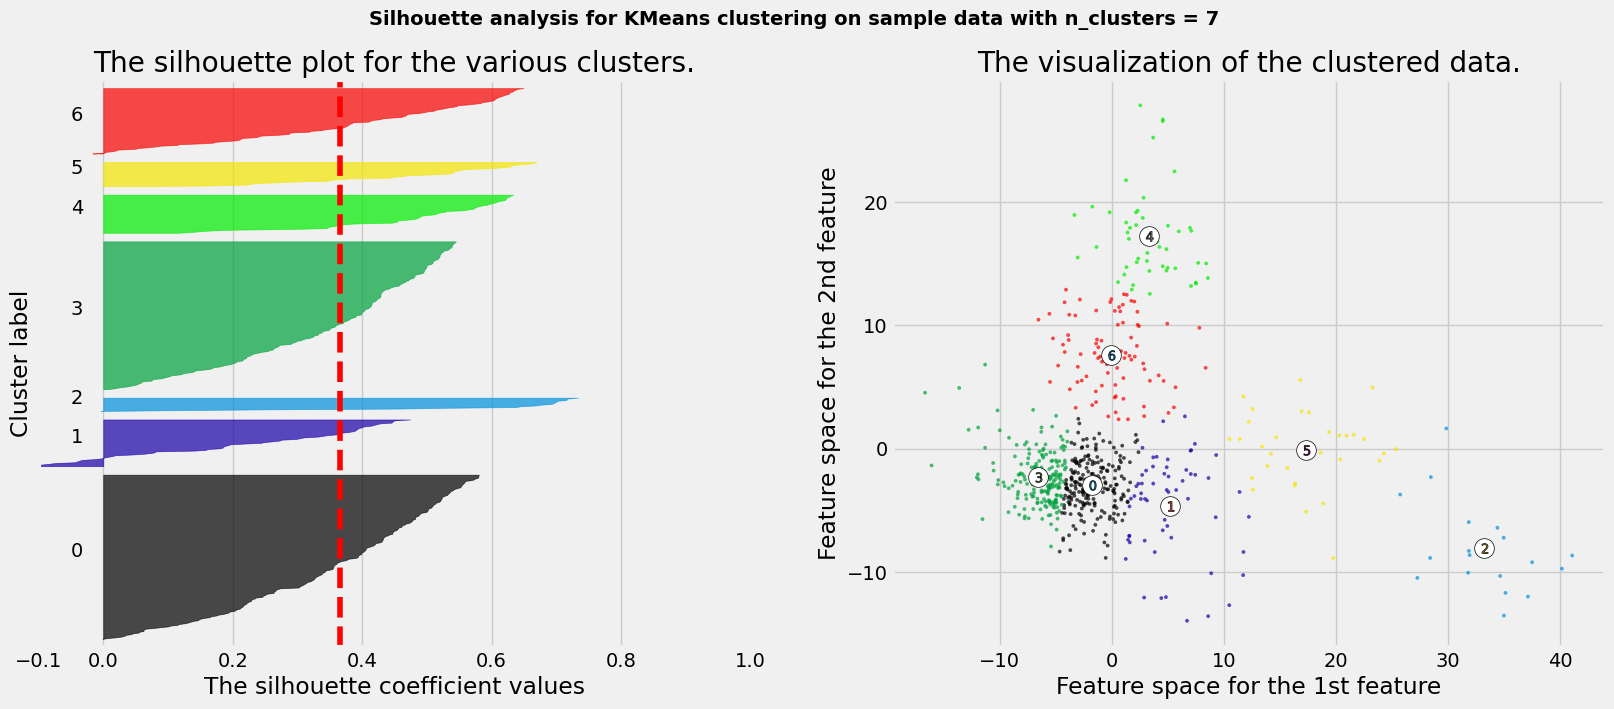

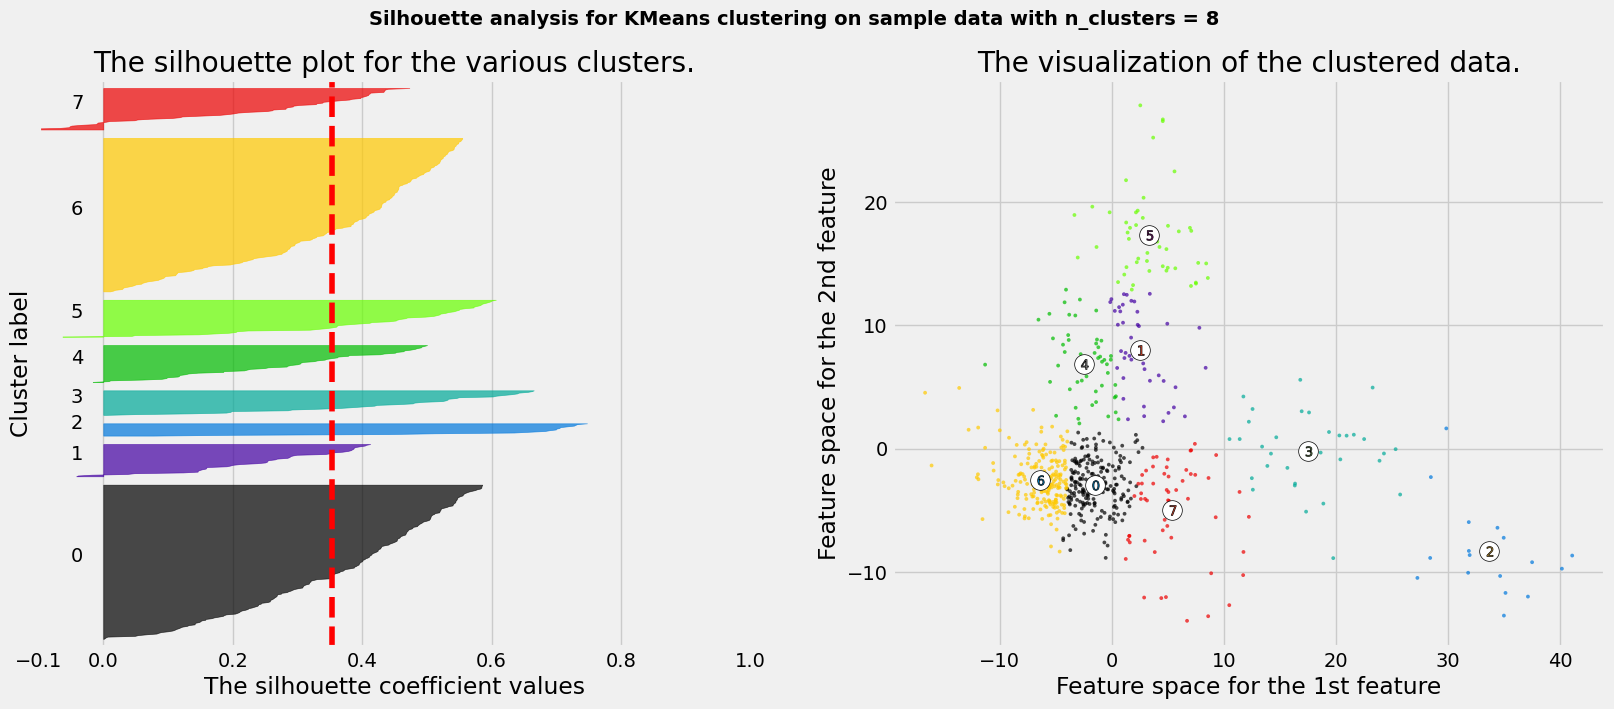

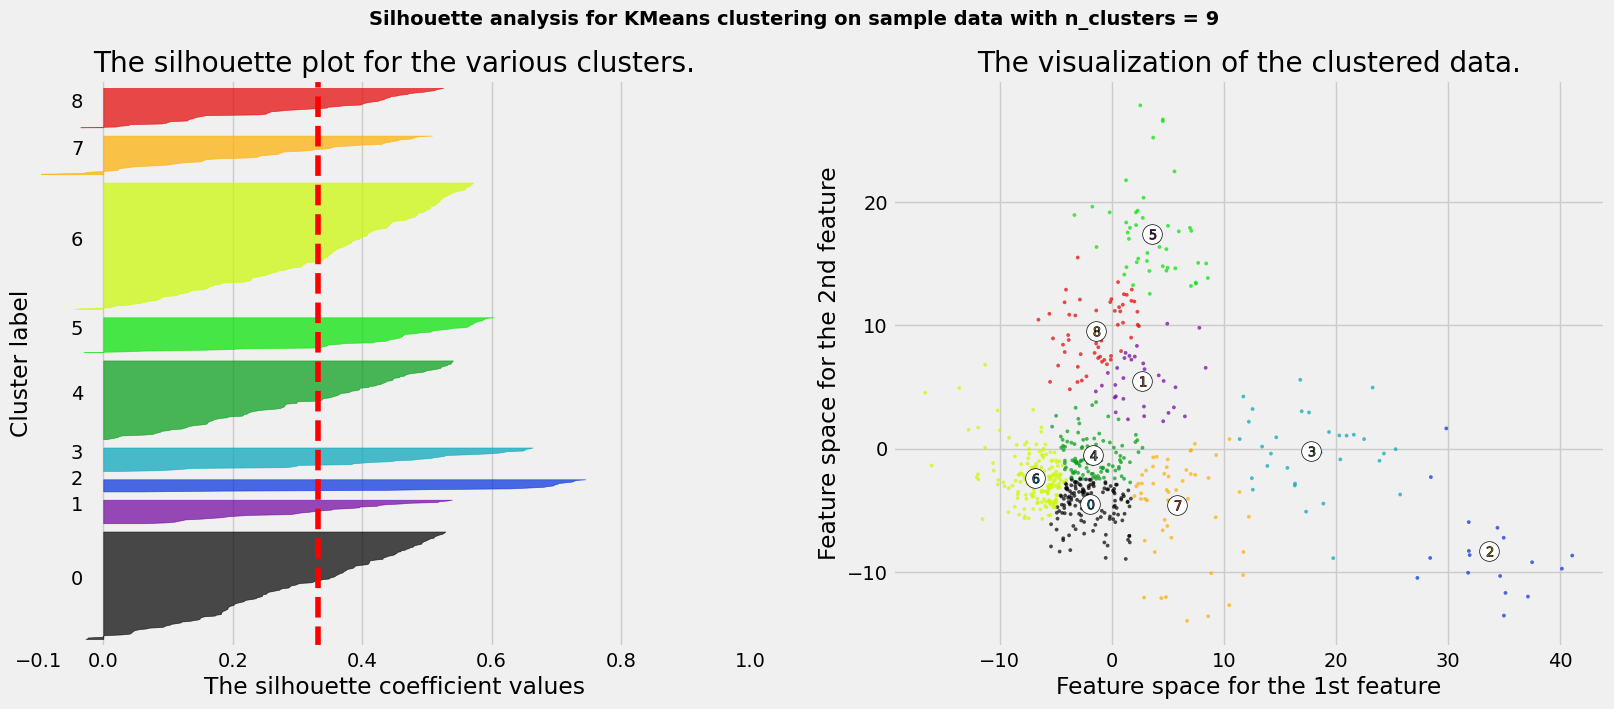

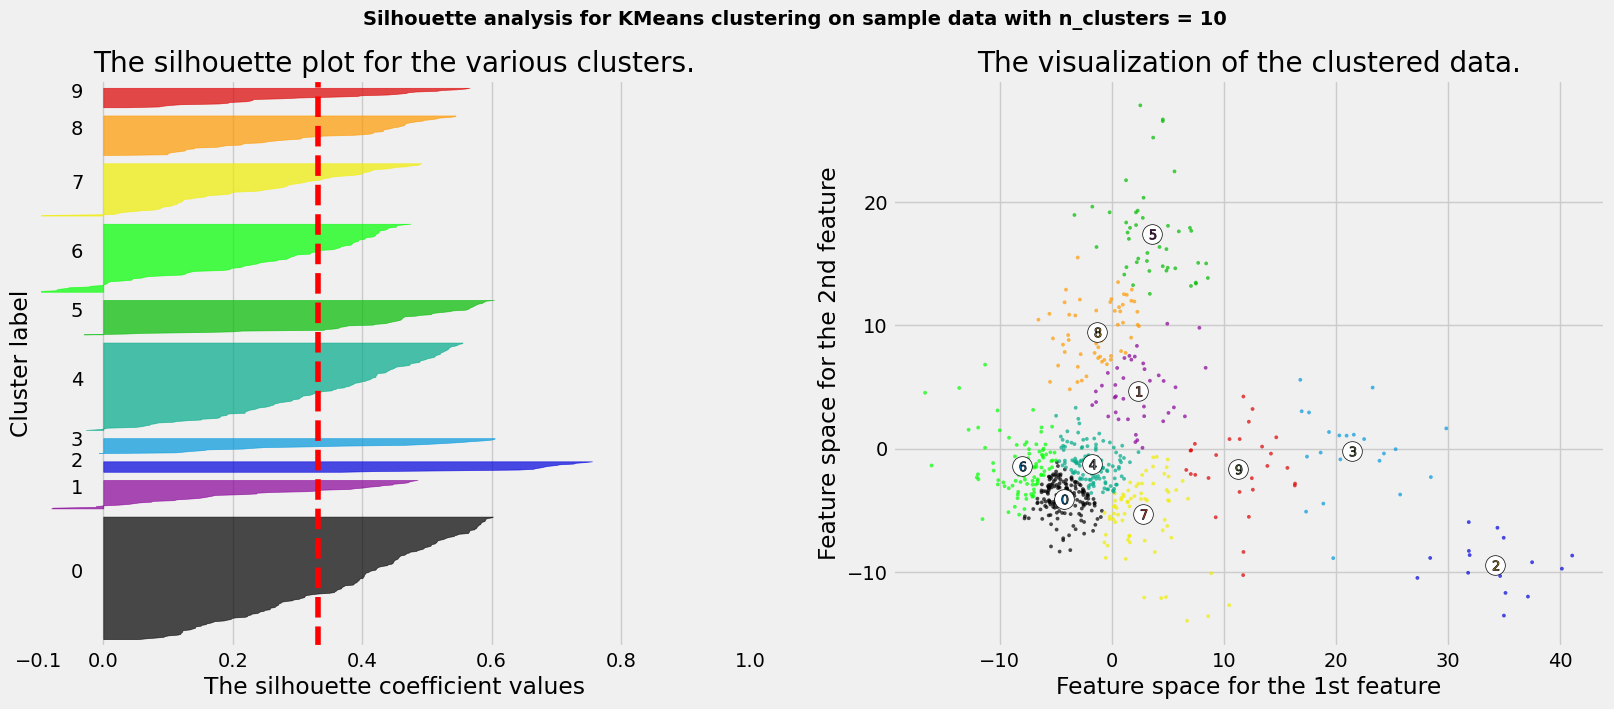

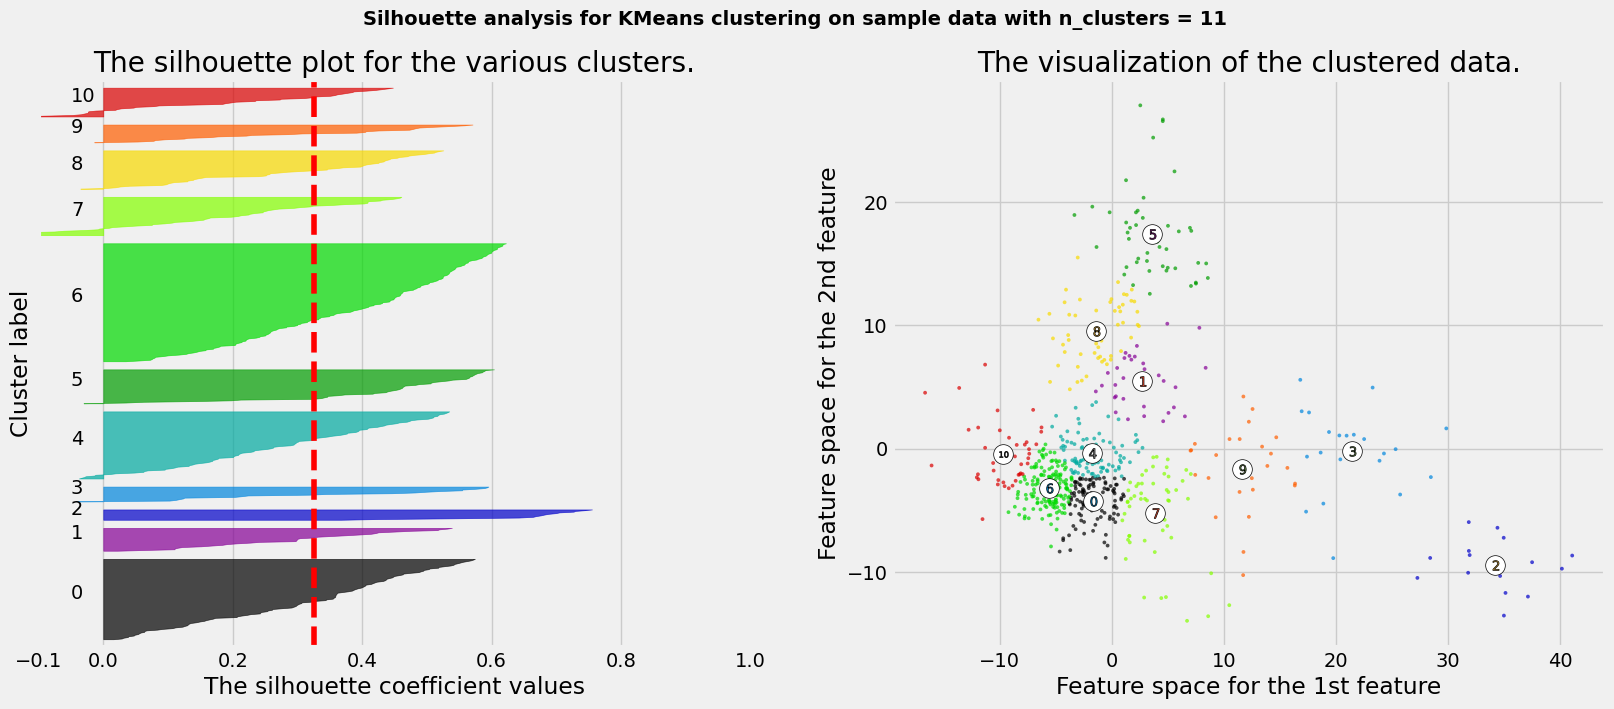

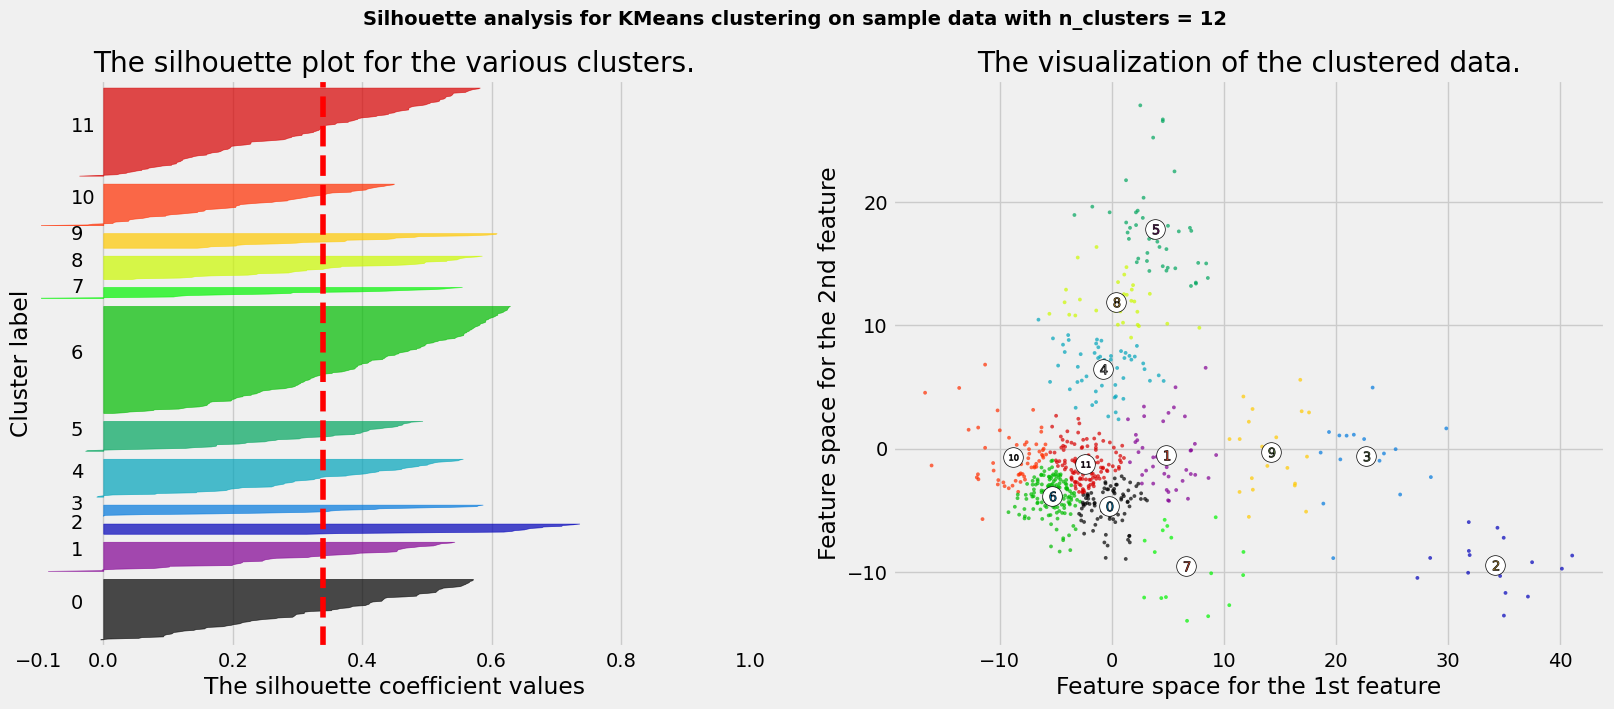

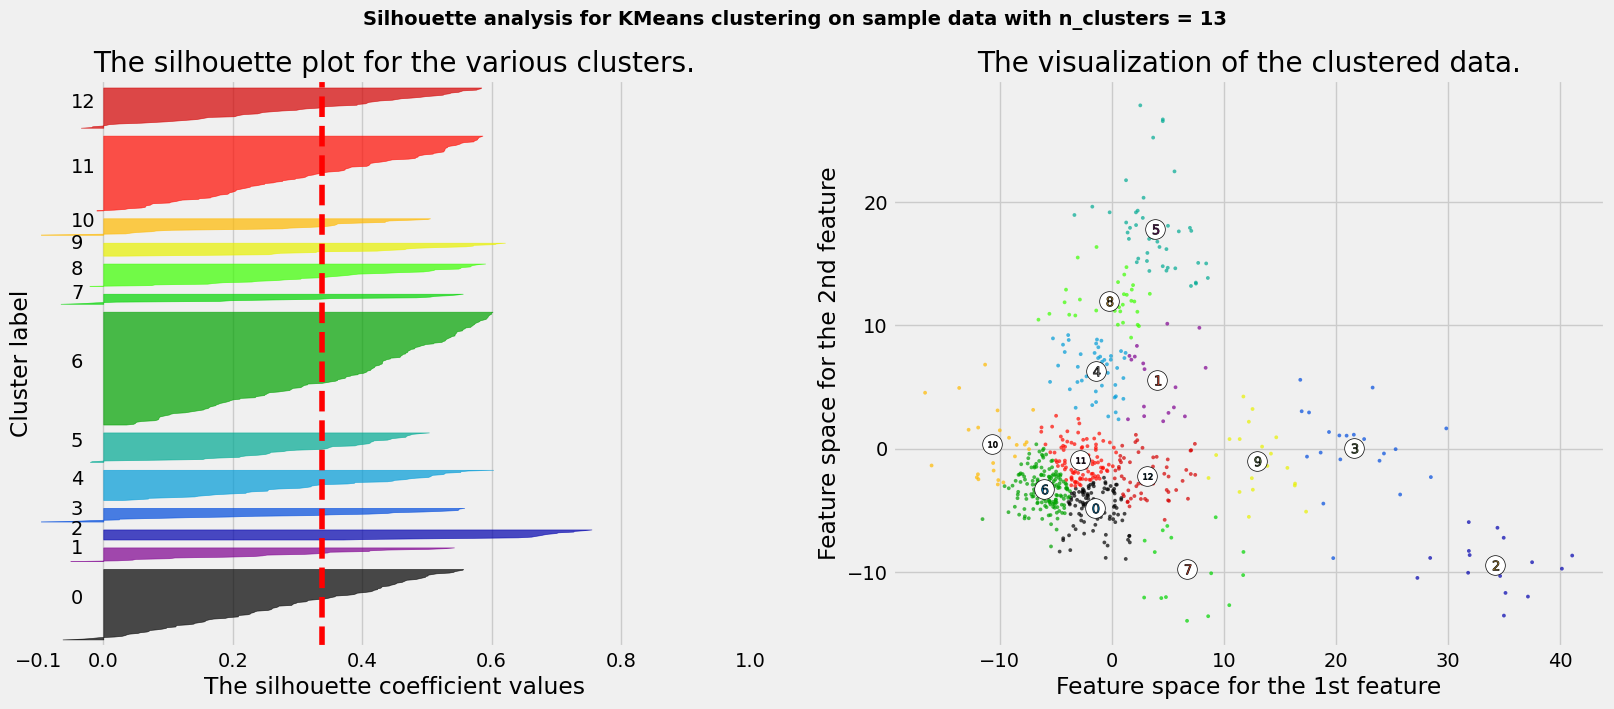

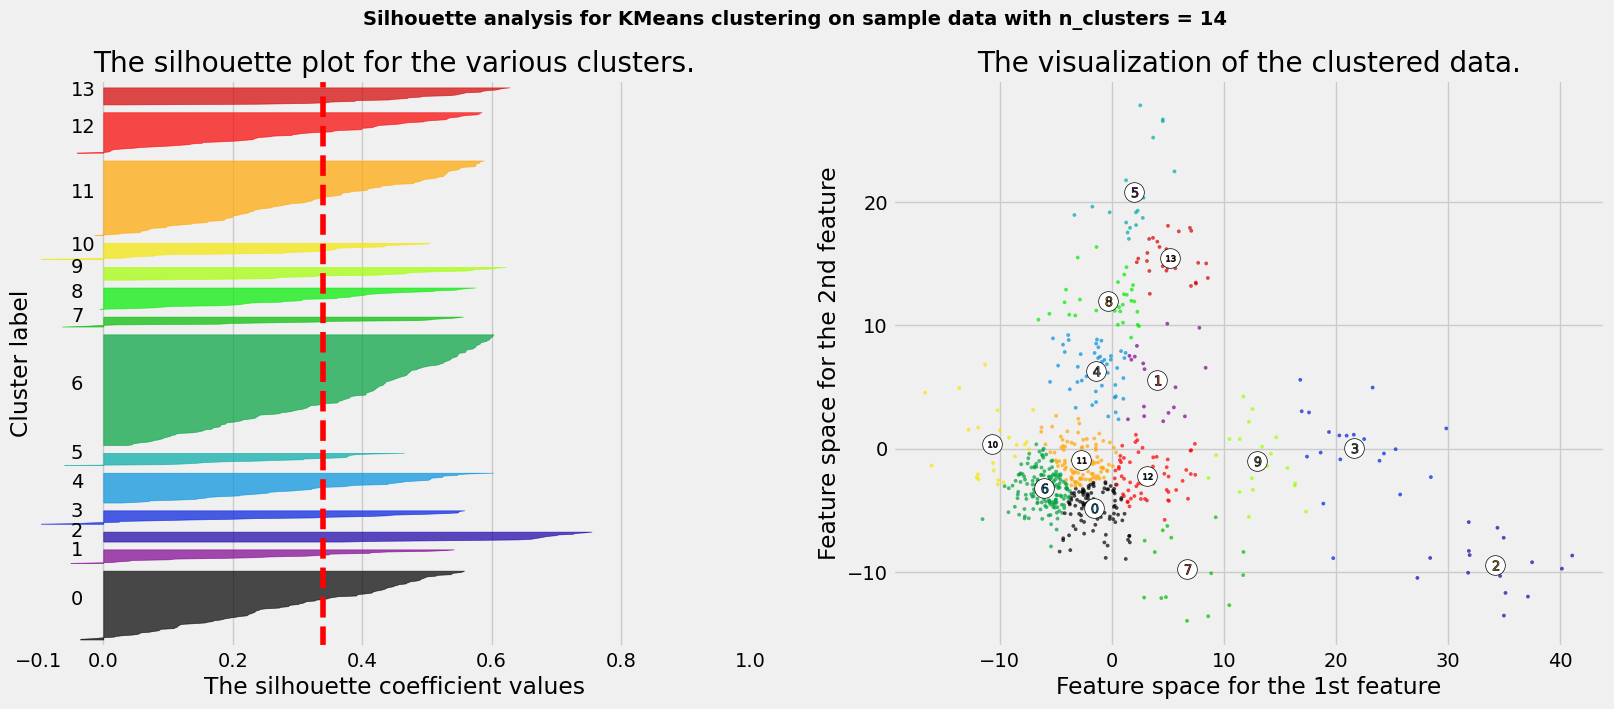

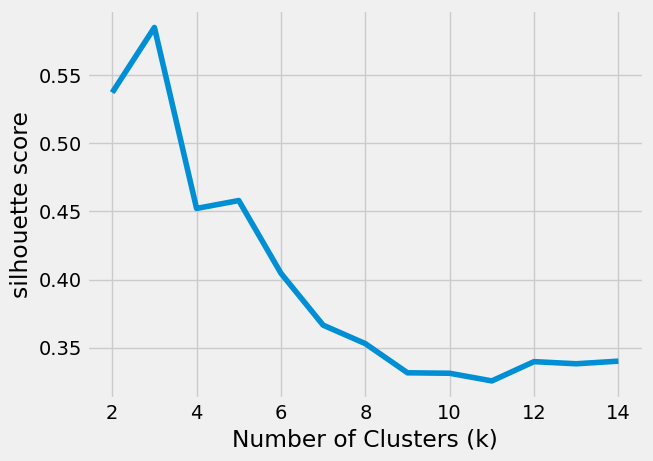

In [133]:
range_n_clusters = np.arange(2 ,15)
silhouette_avg_n_clusters = []

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(data_2) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=42, n_init=1)
    cluster_labels = clusterer.fit_predict(data_2)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(data_2, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    silhouette_avg_n_clusters.append(silhouette_avg)
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(data_2, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(data_2[:, 0], data_2[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()


style.use("fivethirtyeight")
plt.plot(range_n_clusters, silhouette_avg_n_clusters)
plt.xlabel("Number of Clusters (k)")
plt.ylabel("silhouette score")
plt.show()

## Go with 2 dimensions and 3 clusters

In [138]:
clusterer = KMeans(n_clusters=3, random_state=42, n_init=1)
cluster_labels = clusterer.fit_predict(data_2)

In [145]:
selected_df = pd.read_csv('selected_df.csv', 
                          index_col=0)

selected_df['cluster'] = cluster_labels

In [149]:
selected_df['cluster'].value_counts()

0    472
1    123
2     54
Name: cluster, dtype: int64

In [152]:
selected_df[selected_df['cluster'] ==0]['combined_reviews']

1945    Aucun SAV à éviter Nous avons commandé et reçu...
454     Mépris et arnaque Mépris total pour le client ...
457     Carrefour traiteur à fuir Mon expérience conce...
1312    Service de livraison et ou de Drive… Service d...
453     Nous avons acheté en 2016 une piscine… Nous av...
                              ...                        
1978    Impec rien à dire J'ai commandé une télé pour ...
1981    Bonne expérience J'ai commandé un lecteur MP4,...
1984    Tout s'est bien passé: rapidité, efficacité. C...
1986    Très satisfait , mais... Achat de :Powerline A...
1994    moi j'aime bien carrefour drive je prends mes ...
Name: combined_reviews, Length: 472, dtype: object

In [153]:
selected_df[selected_df['cluster'] ==0]['combined_reviews'].iloc[0]

"Aucun SAV à éviter Nous avons commandé et reçu une tablette,  à un prix très avantageux, jusque là, après avoir lu les autres avis, nous avons été chanceux. Après quelques utilisations, elle refuse de s'allumer. Nous avons encore eu la chance de réussir à contacter le SAV à l'étranger, bien entendu. Mais le courriel qui devait nous permettre de renvoyer la tablette ne nous est jamais parvenu. Depuis impossible de joindre le SAV, comme les autres, nous  patientons 5 minutes puis on nous annonce que personne ne peut nous répondre. Les courriels ne sont pas plus efficaces : réponse automatique sans suite..."

In [154]:
selected_df[selected_df['cluster'] ==0]['combined_reviews'].iloc[1]

'Mépris et arnaque Mépris total pour le client et arnaque en masse. J’achète une cafetière expresso et le jour de la livraison on m’annonce que cette dernière n’est pas disponible. On m’invite à repasser commande mais 100€ plus cher…le service client ne répond même pas aux demandes.'

In [155]:
selected_df[selected_df['cluster'] ==0]['combined_reviews'].iloc[2]

'Carrefour traiteur à fuir Mon expérience concerne Carrefour traiteur: PLUS JAMAIS !Tout d\'abord il est écrit \'retrait en drive\' mais au drive, personne n\'est au courant... à l\'accueil non plus... Et quand mon mari trouve enfin la bonne personne, il n\'y a pas les verrines! J\'avais commandé une soixantaine de verrines et des canapés, nous n\'avons eu que les canapés...Bien sûr, tout était déjà payé mais ils n\'en étaient même pas sûrs... Ouf, on a fini par être remboursés!1h avant, j\'avais le mail "n\'oubliez pas votre commande"!Le lendemain, j\'avais le mail "qu\'en avez-vous pensé ?" mais quand je clique dessus pour leur exprimer ma façon de penser, je retombe juste sur le site pour commander...TOUT est donc à revoir pour eux et à fuir pour la clientèle !'

In [156]:
selected_df[selected_df['cluster'] ==1]['combined_reviews'].iloc[2]

"J'ai acheté du pain et la date est… J'ai acheté du pain et la date est dépassé la date et du 13/02/2020 et on est le 14 je l'ai pas vu le pain et encore bon ils auraient dû l'enlever"

In [160]:
selected_df[selected_df['cluster'] ==1]['combined_reviews'].iloc[10]

'Les personnes de carrefour et… Les personnes de carrefour et désagréable ne sont pas a votre écoute et on vous remballe comme un moin que rien on vous raconte n importe quoi juste pour pas vous rembourser j ai mis 3h hier a me faire rembourser pour une tablette qui ne marché même pas enfin bref carrefours salaise sur sanne'

In [165]:
selected_df[selected_df['cluster'] ==2]['combined_reviews'].iloc[1]

"honte a carrefour pour de tels procedes honte a carrefour pour de tels procedesproduits tefal non disponiblehotline injoignable  50 appels sur 4 joursimpossible de sincscrire sur op carrefour l'arnaque totalvoila comment on perd un tres bon clientlidl et intermarche sont la tant mieux"

In [170]:
selected_df.head(25)

titles  ratings  \
1945                              Aucun SAV à éviter        1   
826          impossible de se connecter er de créer…        1   
454                                Mépris et arnaque        1   
457                        Carrefour traiteur à fuir        1   
682                                      Zéro pointé        1   
1312            Service de livraison et ou de Drive…        1   
453           Nous avons acheté en 2016 une piscine…        1   
303           J’ai fait une commande avec livraison…        1   
328                               Couteaux sabatiers        1   
944               Bonjour,j'ai acheté 2trottinettes…        1   
435          Distanciation inexistante au carrefour…        1   
452    Un achat Black Friday qui a viré au cauchemar        1   
76                           Allo monsieur Bompard !        1   
1435             J'ai acheté du pain et la date est…        1   
38           Suite à des courses effectuées dans un…        1   
1971       inacceptable, mauvais service après-vente        1   
1053           Publicité mensongère affiche un jeux…        1   
1926                      Carrefour site à fuir !!!!        1   
221                 Ce matin au supermarché de Berck        1   
210                                arnaque carrefour        1   
1574                   Concernant le carrefour drive        1   
1247            Service livraison et service client…        1   
1556                                INCOMPÉTENTS !!!        1   
1787  Je parle du carrefour contact de Fourchambault        1   
1859                           NE PAS COMMANDER !!!!        1   

                                                reviews  \
1945  Nous avons commandé et reçu une tablette,  à u...   
826    impossible de se connecter er de créer un compte   
454   Mépris total pour le client et arnaque en mass...   
457   Mon expérience concerne Carrefour traiteur: PL...   
682   Zero pointé car opération  mal conçue.  Carref...   
1312  Service de livraison et ou de Drive pratique m...   
453   Nous avons acheté en 2016 une piscine en bois ...   
303   J’ai fait une commande avec livraison attentio...   
328   J' ai les vignettes papier et digitale.on m a ...   
944   Bonjour,j'ai acheté 2trottinettes électronique...   
435   Distanciation inexistante au carrefour part di...   
452   J’ai passer une commande le 27/11 pour un ordi...   
76    Allo monsieur Bompard !\nHonteux, scandaleux, ...   
1435  J'ai acheté du pain et la date est dépassé la ...   
38    Suite à des courses effectuées dans un carrefo...   
1971  Je fais toutes mes courses chaque semaine à ca...   
1053  Publicité mensongère affiche un jeux vidéos pa...   
1926  Commande passée le 28/11 avec une livraison so...   
221   Ce matin au supermarché de Berck, je veux util...   
210   Bjr\n je suis passé au magasin de Collégien. D...   
1574  Concernant le carrefour drive, ils ne sont pas...   
1247  Service livraison et service client incompéten...   
1556  INCOMPÉTENTS !!!\nJ’ai commandé des fourniture...   
1787  Je parle du carrefour contact de Fourchambault...   
1859  j'ai eu un rendez vous avec un transporteur qu...   

                         dates  \
1945  2014-11-01T11:09:09.000Z   
826   2021-04-18T12:53:31.000Z   
454   2021-12-08T16:58:00.000Z   
457   2021-12-08T12:31:55.000Z   
682   2021-05-02T12:04:10.000Z   
1312  2020-05-20T23:42:15.000Z   
453   2021-12-10T09:54:56.000Z   
303   2022-05-11T15:20:51.000Z   
328   2022-05-04T14:48:55.000Z   
944   2021-01-29T09:21:30.000Z   
435   2021-12-28T13:17:36.000Z   
452   2021-12-10T10:53:33.000Z   
76    2022-11-02T11:16:48.000Z   
1435  2020-02-14T18:07:19.000Z   
38    2022-12-15T08:26:24.000Z   
1971  2014-06-12T09:45:37.000Z   
1053  2020-11-21T06:12:46.000Z   
1926  2014-12-19T09:56:58.000Z   
221   2022-07-21T18:24:00.000Z   
210   2022-08-03T19:17:50.000Z   
1574  2019-08-31T09:42:39.000Z   
1247  2020-06-27T08:03:53.000Z   
1556  2019-09-25T17:55:48.000Z   
1787

___

In [186]:
y_data = pd.read_csv('/Users/carlosito/Library/CloudStorage/OneDrive-Personal/Personal Document/Hexamind/hexamind_code/Carrefour/Clustering/unsupervised/selected_df - y-data.csv',
            index_col=0).reset_index()
y_data

Index  ratings                                          titles  \
0    1945        1                              Aucun SAV à éviter   
1     826        1         impossible de se connecter er de créer…   
2     454        1                               Mépris et arnaque   
3     457        1                       Carrefour traiteur à fuir   
4     682        1                                     Zéro pointé   
5    1312        1            Service de livraison et ou de Drive…   
6     453        1          Nous avons acheté en 2016 une piscine…   
7     303        1          J’ai fait une commande avec livraison…   
8     328        1                              Couteaux sabatiers   
9     944        1              Bonjour,j'ai acheté 2trottinettes…   
10    435        1         Distanciation inexistante au carrefour…   
11    452        1   Un achat Black Friday qui a viré au cauchemar   
12     76        1                         Allo monsieur Bompard !   
13   1435        1             J'ai acheté du pain et la date est…   
14     38        1         Suite à des courses effectuées dans un…   
15   1971        1       inacceptable, mauvais service après-vente   
16   1053        1           Publicité mensongère affiche un jeux…   
17   1926        1                      Carrefour site à fuir !!!!   
18    221        1                Ce matin au supermarché de Berck   
19    210        1                               arnaque carrefour   
20   1574        1                   Concernant le carrefour drive   
21   1247        1            Service livraison et service client…   
22   1556        1                                INCOMPÉTENTS !!!   
23   1787        1  Je parle du carrefour contact de Fourchambault   

                                         clean_review  \
0   Nous avons commandé et reçu une tablette,  à u...   
1    impossible de se connecter er de créer un compte   
2   Mépris total pour le client et arnaque en mass...   
3   Mon expérience concerne Carrefour traiteur: PL...   
4   Zero pointé car opération  mal conçue.  Carref...   
5   Service de livraison et ou de Drive pratique m...   
6   Nous avons acheté en 2016 une piscine en bois ...   
7   J’ai fait une commande avec livraison attentio...   
8   J' ai les vignettes papier et digitale.on m a ...   
9   Bonjour,j'ai acheté 2trottinettes électronique...   
10  Distanciation inexistante au carrefour part di...   
11  J’ai passer une commande le 27/11 pour un ordi...   
12  Allo monsieur Bompard !Honteux, scandaleux, vo...   
13  J'ai acheté du pain et la date est dépassé la ...   
14  Suite à des courses effectuées dans un carrefo...   
15  Je fais toutes mes courses chaque semaine à ca...   
16  Publicité mensongère affiche un jeux vidéos pa...   
17  Commande passée le 28/11 avec une livraison so...   
18  Ce matin au supermarché de Berck, je veux util...   
19  Bjr je suis passé au magasin de Collégien. Dan...   
20  Concernant le carrefour drive, ils ne sont pas...   
21  Service livraison et service client incompéten...   
22  INCOMPÉTENTS !!!J’ai commandé des fournitures ...   
23  Je parle du carrefour contact de Fourchambault...   

                                     combined_reviews  reviews_len  Channel  \
0   Aucun SAV à éviter Nous avons commandé et reçu...          102     True   
1   impossible de se connecter er de créer… imposs...           16     True   
2   Mépris et arnaque Mépris total pour le client ...           47     True   
3   Carrefour traiteur à fuir Mon expérience conce...          128    False   
4   Zéro pointé Zero pointé car opération  mal con...           41    False   
5   Service de livraison et ou de Drive… Service d...          153    False   
6   Nous avons acheté en 2016 une piscine… Nous av...          170    False   
7   J’ai fait une commande avec livraison… J’ai fa...           35     True   
8   Couteaux sabatiers J' ai les vignettes papier ...           58    False   
9   Bonjour,j'ai acheté 2trottinettes

In [187]:
def transfom_boolean_to_integer(boolean):
    if boolean:
        bool_val = 1
    else:
        bool_val = 0
    return bool_val

In [188]:
topic_names = y_data.columns[-5:]
for topic in topic_names:
    y_data[f'{topic}_val'] = y_data[topic].apply(lambda x : transfom_boolean_to_integer(x))

In [189]:
y_data

Index  ratings                                          titles  \
0    1945        1                              Aucun SAV à éviter   
1     826        1         impossible de se connecter er de créer…   
2     454        1                               Mépris et arnaque   
3     457        1                       Carrefour traiteur à fuir   
4     682        1                                     Zéro pointé   
5    1312        1            Service de livraison et ou de Drive…   
6     453        1          Nous avons acheté en 2016 une piscine…   
7     303        1          J’ai fait une commande avec livraison…   
8     328        1                              Couteaux sabatiers   
9     944        1              Bonjour,j'ai acheté 2trottinettes…   
10    435        1         Distanciation inexistante au carrefour…   
11    452        1   Un achat Black Friday qui a viré au cauchemar   
12     76        1                         Allo monsieur Bompard !   
13   1435        1             J'ai acheté du pain et la date est…   
14     38        1         Suite à des courses effectuées dans un…   
15   1971        1       inacceptable, mauvais service après-vente   
16   1053        1           Publicité mensongère affiche un jeux…   
17   1926        1                      Carrefour site à fuir !!!!   
18    221        1                Ce matin au supermarché de Berck   
19    210        1                               arnaque carrefour   
20   1574        1                   Concernant le carrefour drive   
21   1247        1            Service livraison et service client…   
22   1556        1                                INCOMPÉTENTS !!!   
23   1787        1  Je parle du carrefour contact de Fourchambault   

                                         clean_review  \
0   Nous avons commandé et reçu une tablette,  à u...   
1    impossible de se connecter er de créer un compte   
2   Mépris total pour le client et arnaque en mass...   
3   Mon expérience concerne Carrefour traiteur: PL...   
4   Zero pointé car opération  mal conçue.  Carref...   
5   Service de livraison et ou de Drive pratique m...   
6   Nous avons acheté en 2016 une piscine en bois ...   
7   J’ai fait une commande avec livraison attentio...   
8   J' ai les vignettes papier et digitale.on m a ...   
9   Bonjour,j'ai acheté 2trottinettes électronique...   
10  Distanciation inexistante au carrefour part di...   
11  J’ai passer une commande le 27/11 pour un ordi...   
12  Allo monsieur Bompard !Honteux, scandaleux, vo...   
13  J'ai acheté du pain et la date est dépassé la ...   
14  Suite à des courses effectuées dans un carrefo...   
15  Je fais toutes mes courses chaque semaine à ca...   
16  Publicité mensongère affiche un jeux vidéos pa...   
17  Commande passée le 28/11 avec une livraison so...   
18  Ce matin au supermarché de Berck, je veux util...   
19  Bjr je suis passé au magasin de Collégien. Dan...   
20  Concernant le carrefour drive, ils ne sont pas...   
21  Service livraison et service client incompéten...   
22  INCOMPÉTENTS !!!J’ai commandé des fournitures ...   
23  Je parle du carrefour contact de Fourchambault...   

                                     combined_reviews  reviews_len  Channel  \
0   Aucun SAV à éviter Nous avons commandé et reçu...          102     True   
1   impossible de se connecter er de créer… imposs...           16     True   
2   Mépris et arnaque Mépris total pour le client ...           47     True   
3   Carrefour traiteur à fuir Mon expérience conce...          128    False   
4   Zéro pointé Zero pointé car opération  mal con...           41    False   
5   Service de livraison et ou de Drive… Service d...          153    False   
6   Nous avons acheté en 2016 une piscine… Nous av...          170    False   
7   J’ai fait une commande avec livraison… J’ai fa...           35     True   
8   Couteaux sabatiers J' ai les vignettes papier ...           58    False   
9   Bonjour,j'ai acheté 2trottinettes

In [190]:
# y_data.to_csv('y_data.csv')

In [193]:
y_data

Index  ratings                                          titles  \
0    1945        1                              Aucun SAV à éviter   
1     826        1         impossible de se connecter er de créer…   
2     454        1                               Mépris et arnaque   
3     457        1                       Carrefour traiteur à fuir   
4     682        1                                     Zéro pointé   
5    1312        1            Service de livraison et ou de Drive…   
6     453        1          Nous avons acheté en 2016 une piscine…   
7     303        1          J’ai fait une commande avec livraison…   
8     328        1                              Couteaux sabatiers   
9     944        1              Bonjour,j'ai acheté 2trottinettes…   
10    435        1         Distanciation inexistante au carrefour…   
11    452        1   Un achat Black Friday qui a viré au cauchemar   
12     76        1                         Allo monsieur Bompard !   
13   1435        1             J'ai acheté du pain et la date est…   
14     38        1         Suite à des courses effectuées dans un…   
15   1971        1       inacceptable, mauvais service après-vente   
16   1053        1           Publicité mensongère affiche un jeux…   
17   1926        1                      Carrefour site à fuir !!!!   
18    221        1                Ce matin au supermarché de Berck   
19    210        1                               arnaque carrefour   
20   1574        1                   Concernant le carrefour drive   
21   1247        1            Service livraison et service client…   
22   1556        1                                INCOMPÉTENTS !!!   
23   1787        1  Je parle du carrefour contact de Fourchambault   

                                         clean_review  \
0   Nous avons commandé et reçu une tablette,  à u...   
1    impossible de se connecter er de créer un compte   
2   Mépris total pour le client et arnaque en mass...   
3   Mon expérience concerne Carrefour traiteur: PL...   
4   Zero pointé car opération  mal conçue.  Carref...   
5   Service de livraison et ou de Drive pratique m...   
6   Nous avons acheté en 2016 une piscine en bois ...   
7   J’ai fait une commande avec livraison attentio...   
8   J' ai les vignettes papier et digitale.on m a ...   
9   Bonjour,j'ai acheté 2trottinettes électronique...   
10  Distanciation inexistante au carrefour part di...   
11  J’ai passer une commande le 27/11 pour un ordi...   
12  Allo monsieur Bompard !Honteux, scandaleux, vo...   
13  J'ai acheté du pain et la date est dépassé la ...   
14  Suite à des courses effectuées dans un carrefo...   
15  Je fais toutes mes courses chaque semaine à ca...   
16  Publicité mensongère affiche un jeux vidéos pa...   
17  Commande passée le 28/11 avec une livraison so...   
18  Ce matin au supermarché de Berck, je veux util...   
19  Bjr je suis passé au magasin de Collégien. Dan...   
20  Concernant le carrefour drive, ils ne sont pas...   
21  Service livraison et service client incompéten...   
22  INCOMPÉTENTS !!!J’ai commandé des fournitures ...   
23  Je parle du carrefour contact de Fourchambault...   

                                     combined_reviews  reviews_len  Channel  \
0   Aucun SAV à éviter Nous avons commandé et reçu...          102     True   
1   impossible de se connecter er de créer… imposs...           16     True   
2   Mépris et arnaque Mépris total pour le client ...           47     True   
3   Carrefour traiteur à fuir Mon expérience conce...          128    False   
4   Zéro pointé Zero pointé car opération  mal con...           41    False   
5   Service de livraison et ou de Drive… Service d...          153    False   
6   Nous avons acheté en 2016 une piscine… Nous av...          170    False   
7   J’ai fait une commande avec livraison… J’ai fa...           35     True   
8   Couteaux sabatiers J' ai les vignettes papier ...           58    False   
9   Bonjour,j'ai acheté 2trottinettes

In [195]:
y_data.iloc[:, -5:]

Channel_val  Buying Experience_val  Product_val  Delivery_val  \
0             1                      0            0             0   
1             1                      0            0             0   
2             1                      0            0             1   
3             0                      0            0             1   
4             0                      0            0             0   
5             0                      0            0             1   
6             0                      0            1             0   
7             1                      0            0             0   
8             0                      1            0             0   
9             0                      0            1             0   
10            1                      1            0             0   
11            0                      1            1             0   
12            0                      0            0             0   
13            1                      0            1             0   
14            1                      0            1             0   
15            1                      0            0             0   
16            1                      1            0             0   
17            1                      0            0             0   
18            1                      1            0             0   
19            1                      1            0             0   
20            1                      0            0             1   
21            0                      0            0             1   
22            1                      1            0             1   
23            1                      1            1             0   

    Customer Service_val  
0                      1  
1                      0  
2                      1  
3                      1  
4                      1  
5                      1  
6                      1  
7                      0  
8                      0  
9                      1  
10                     0  
11                     1  
12                     1  
13                     0  
14                     0  
15                     1  
16                     0  
17                     0  
18                     0  
19                     0  
20                     0  
21                     1  
22                     1  
23                     0

In [200]:
pd.read_csv('data.csv', header=None).to_numpy().shape

(649, 768)